In [1]:
#install.packages(c("visNetwork", "geomnet", "igraph"))

In [2]:
library(h2o)
library(tidyverse)
library(visNetwork)
library(geomnet)
library(igraph)
library(prophet)
library(plotly)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warn

# Data Loading from csv and preparation

In [3]:
path <- 'C:/Users/ben/lego/'
df <- read.csv(paste0(path,'output.csv'))

## Create crossprod from dummy variabkes
dim(df)
x1 <- as.matrix(df[,which(grepl("primary_tag_", names(df)))])
x2 <- as.matrix(df[,which(grepl("secondary_tag_", names(df)))])
x1_cp <-crossprod(x1) 
x2_cp <-crossprod(x2)

## Create mapping table from primary tags
table1 <- data.frame()
r <- 0
for (i in 1:(nrow(x1_cp)-1)){
  for (j in (i+1):ncol(x1_cp)){
    if(x1_cp[i,j] > 0) {
      r = r + 1
      table1[r,"from"]  <- rownames(x1_cp)[i]
      table1[r,"to"]    <- colnames(x1_cp)[j]
      table1[r,"count"] <- x1_cp[i,j]
      # print(r)
    }
  }
}

## Create mapping table from secodary tags, 1 filter of 10 has been set on the edge to reduce the size of the matrix due to 
## performance issue.
table2 <- data.frame()
r <- 0
for (i in 1:(nrow(x2_cp)-1)){
  for (j in (i+1):ncol(x2_cp)){
    if(x2_cp[i,j] >= 10) {
      r = r + 1
      table2[r,"from"]  <- rownames(x2_cp)[i]
      table2[r,"to"]    <- colnames(x2_cp)[j]
      table2[r,"count"] <- x2_cp[i,j]
      # print(r)
    }
  }
}

dim(table1)
dim(table2)

[1] 6391 4138

[1] 604   3

[1] 3047    3

# Primary Tag Network

In [4]:
table1$from <- gsub("primary_tag_", "", table1$from)
table1$to <- gsub("primary_tag_", "", table1$to)

##Nodes
nodes <- data.frame(id = unique(table1$from), 
                    label = unique(table1$from))

##Edges
edges <- as.data.frame(table1)
colnames(edges) <- c("from", "to", "width")

##Create graph for Louvain
graph <- graph_from_data_frame(edges, directed = FALSE)

##Louvain Comunity Detection
cluster <- cluster_louvain(graph)
cluster_df <- data.frame(as.list(membership(cluster)))
cluster_df <- as.data.frame(t(cluster_df))
cluster_df$label <- rownames(cluster_df)

nodes <- left_join(nodes, cluster_df, by = "label")
colnames(nodes)[3] <- "group"
visNetwork(nodes, edges)

HTML widgets cannot be represented in plain text (need html)

# Secondary Tag Network

# Model to predict product own

With the data we downloadn from b

Input: 
* 'main_tags','secondary_tags', pieces, community_want, availability

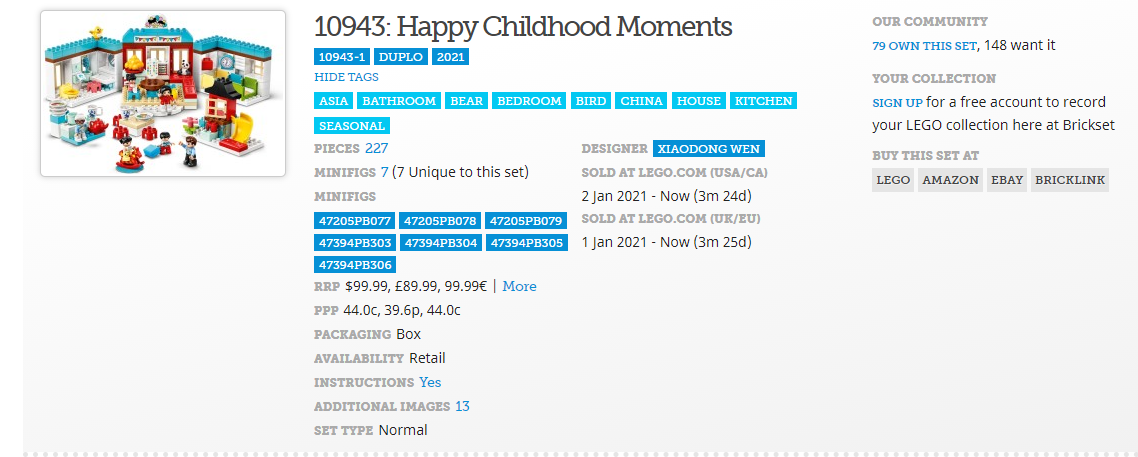

Output:
* community_own

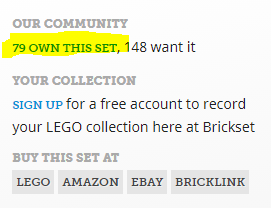


In [6]:
colnames(df)

[1] "year"                                                  
   [2] "id"                                                    
   [3] "name"                                                  
   [4] "community_want"                                        
   [5] "community_own"                                         
   [6] "main_tags"                                             
   [7] "secondary_tags"                                        
   [8] "main_links"                                            
   [9] "secondary_links"                                       
  [10] "pieces"                                                
  [11] "rrp_usd"                                               
  [12] "rrp_gbp"                                               
  [13] "rrp_eur"                                               
  [14] "availability"                                          
  [15] "released"                                              
  [16] "primary_tag_CampCretaceous"                            
  [17] "primary_tag_2in1"                                      
  [18] "primary_tag_3in1"                                      
  [19] "primary_tag_AHeroisBorn"                               
  [20] "primary_tag_AFOLDesignerProgram"                       
  [21] "primary_tag_Accessories"                               
  [22] "primary_tag_AccessorySets"                             
  [23] "primary_tag_Adidas"                                    
  [24] "primary_tag_AdventureCamp"                             
  [25] "primary_tag_Airjitzu"                                  
  [26] "primary_tag_Airport"                                   
  [27] "primary_tag_Aladdin"                                   
  [28] "primary_tag_AmusementPark"                             
  [29] "primary_tag_AnUnexpectedJourney"                       
  [30] "primary_tag_Animalsseries4"                            
  [31] "primary_tag_Animalsseries5"                            
  [32] "primary_tag_Animalsseries6"                            
  [33] "primary_tag_Ant.Man"                                   
  [34] "primary_tag_Ant.ManandtheWasp"                         
  [35] "primary_tag_ArcadePod"                                 
  [36] "primary_tag_Architecture"                              
  [37] "primary_tag_Arctic"                                    
  [38] "primary_tag_Art"                                       
  [39] "primary_tag_ArvoBrothers"                              
  [40] "primary_tag_Audi"                                      
  [41] "primary_tag_Avengers"                                  
  [42] "primary_tag_AvengersAssemble"                          
  [43] "primary_tag_Avengers.AgeofUltron"                      
  [44] "primary_tag_Avengers.Endgame"                          
  [45] "primary_tag_Avengers.InfinityWar"                      
  [46] "primary_tag_BacktotheFuture"                           
  [47] "primary_tag_BagCharms"                                 
  [48] "primary_tag_BagTag"                                    
  [49] "primary_tag_Bagcharms"                                 
  [50] "primary_tag_Bags"                                      
  [51] "primary_tag_BandmatesSeries1"                          
  [52] "primary_tag_BandmatesSeries2"                          
  [53] "primary_tag_Barron.sEducationalSeries"                 
  [54] "primary_tag_BasicSet"                                  
  [55] "primary_tag_Batman"                                    
  [56] "primary_tag_Batman1989"                                
  [57] "primary_tag_BatmanClassicTVSeries"                     
  [58] "primary_tag_BattlePacks"                               
  [59] "primary_tag_BattleSuits"                               
  [60] "primary_tag_Battlefront"                               
  [61] "primary_tag_BeatBox"                                   
  [62] "primary_tag_BeautyandtheBeast"                         
  [63] "primary_tag_Bigfigs"       

In [7]:
h2o.init(nthreads = 8, max_mem_size="15G")


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\ben\AppData\Local\Temp\RtmpY9IDJr\filee6831214f78/h2o_ben_started_from_r.out
    C:\Users\ben\AppData\Local\Temp\RtmpY9IDJr\filee6830cb3d0c/h2o_ben_started_from_r.err


Starting H2O JVM and connecting:  Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 694 milliseconds 
    H2O cluster timezone:       Europe/London 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.1.1 
    H2O cluster version age:    8 months and 11 days !!! 
    H2O cluster name:           H2O_started_from_R_ben_gsz386 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   13.33 GB 
    H2O cluster total cores:    12 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O In

Warning message in h2o.clusterInfo():
"
Your H2O cluster version is too old (8 months and 11 days)!
Please download and install the latest version from http://h2o.ai/download/"

In [8]:
## Tidy column name and remove tag for less than 10 occurrence
df <- read.csv(paste0(path,'output.csv'))
colnames(df) <- gsub("[^[:alnum:] ]", "", colnames(df))
keep1 <- c('communityown','communitywant','rrpusd','availability','pieces','rrpusd')
keep2 <- colnames(df[,16:ncol(df)][,which(colSums(df[,16:ncol(df)]) > 10)])
length(keep2)

[1] 889

In [9]:
df1 <- df[,c(keep1, keep2)]
df1$rrpusd <- as.numeric(gsub('[$,£,€]', '', df1$rrpusd))

In [10]:
df1 <- as.h2o(df1[,c(keep1,keep2)])
split <- h2o.splitFrame(df1, ratios = 0.85)
train <- split[[1]]
test <- split[[2]]

  |======================================================================| 100%


In [11]:
model <- h2o.automl(training_frame=train,
                    y='communityown',
                    x=names(df1)[-1],
                    valid=test
                    )

  |                                                                      |   0%
14:44:54.969: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
  |======================================================================| 100%


Leaderboard

Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the newdata. At most 20 models are shown by default.

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,StackedEnsemble_AllModels_AutoML_20211207_144454,2756379,1660.235,2756379,969.7331,NA,4563,0.126091,StackedEnsemble
2,StackedEnsemble_BestOfFamily_AutoML_20211207_144454,2806392,1675.229,2806392,982.8755,NA,982,0.034245,StackedEnsemble
3,GBM_grid__1_AutoML_20211207_144454_model_12,2883740,1698.158,2883740,1005.5589,NA,5759,0.027340,GBM
4,GBM_grid__1_AutoML_20211207_144454_model_15,2889036,1699.716,2889036,1012.2998,NA,5261,0.018946,GBM
5,GBM_grid__1_AutoML_20211207_144454_model_43,2917622,1708.105,2917622,1002.5671,NA,5627,0.019633,GBM
6,GBM_grid__1_AutoML_20211207_144454_model_44,2936420,1713.599,2936420,1009.3673,NA,5830,0.020494,GBM
7,GBM_grid__1_AutoML_20211207_144454_model_45,2956550,1719.462,2956550,1023.9565,NA,5328,0.022816,GBM
8,GBM_grid__1_AutoML_20211207_144454_model_8,2989474,1729.009,2989474,1060.8081,NA,3880,0.020767,GBM
9,GBM_grid__1_AutoML_20211207_144454_model_16,2992298,1729.826,2992298,1029.7331,NA,6855,0.025573,GBM


Residual Analysis

Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

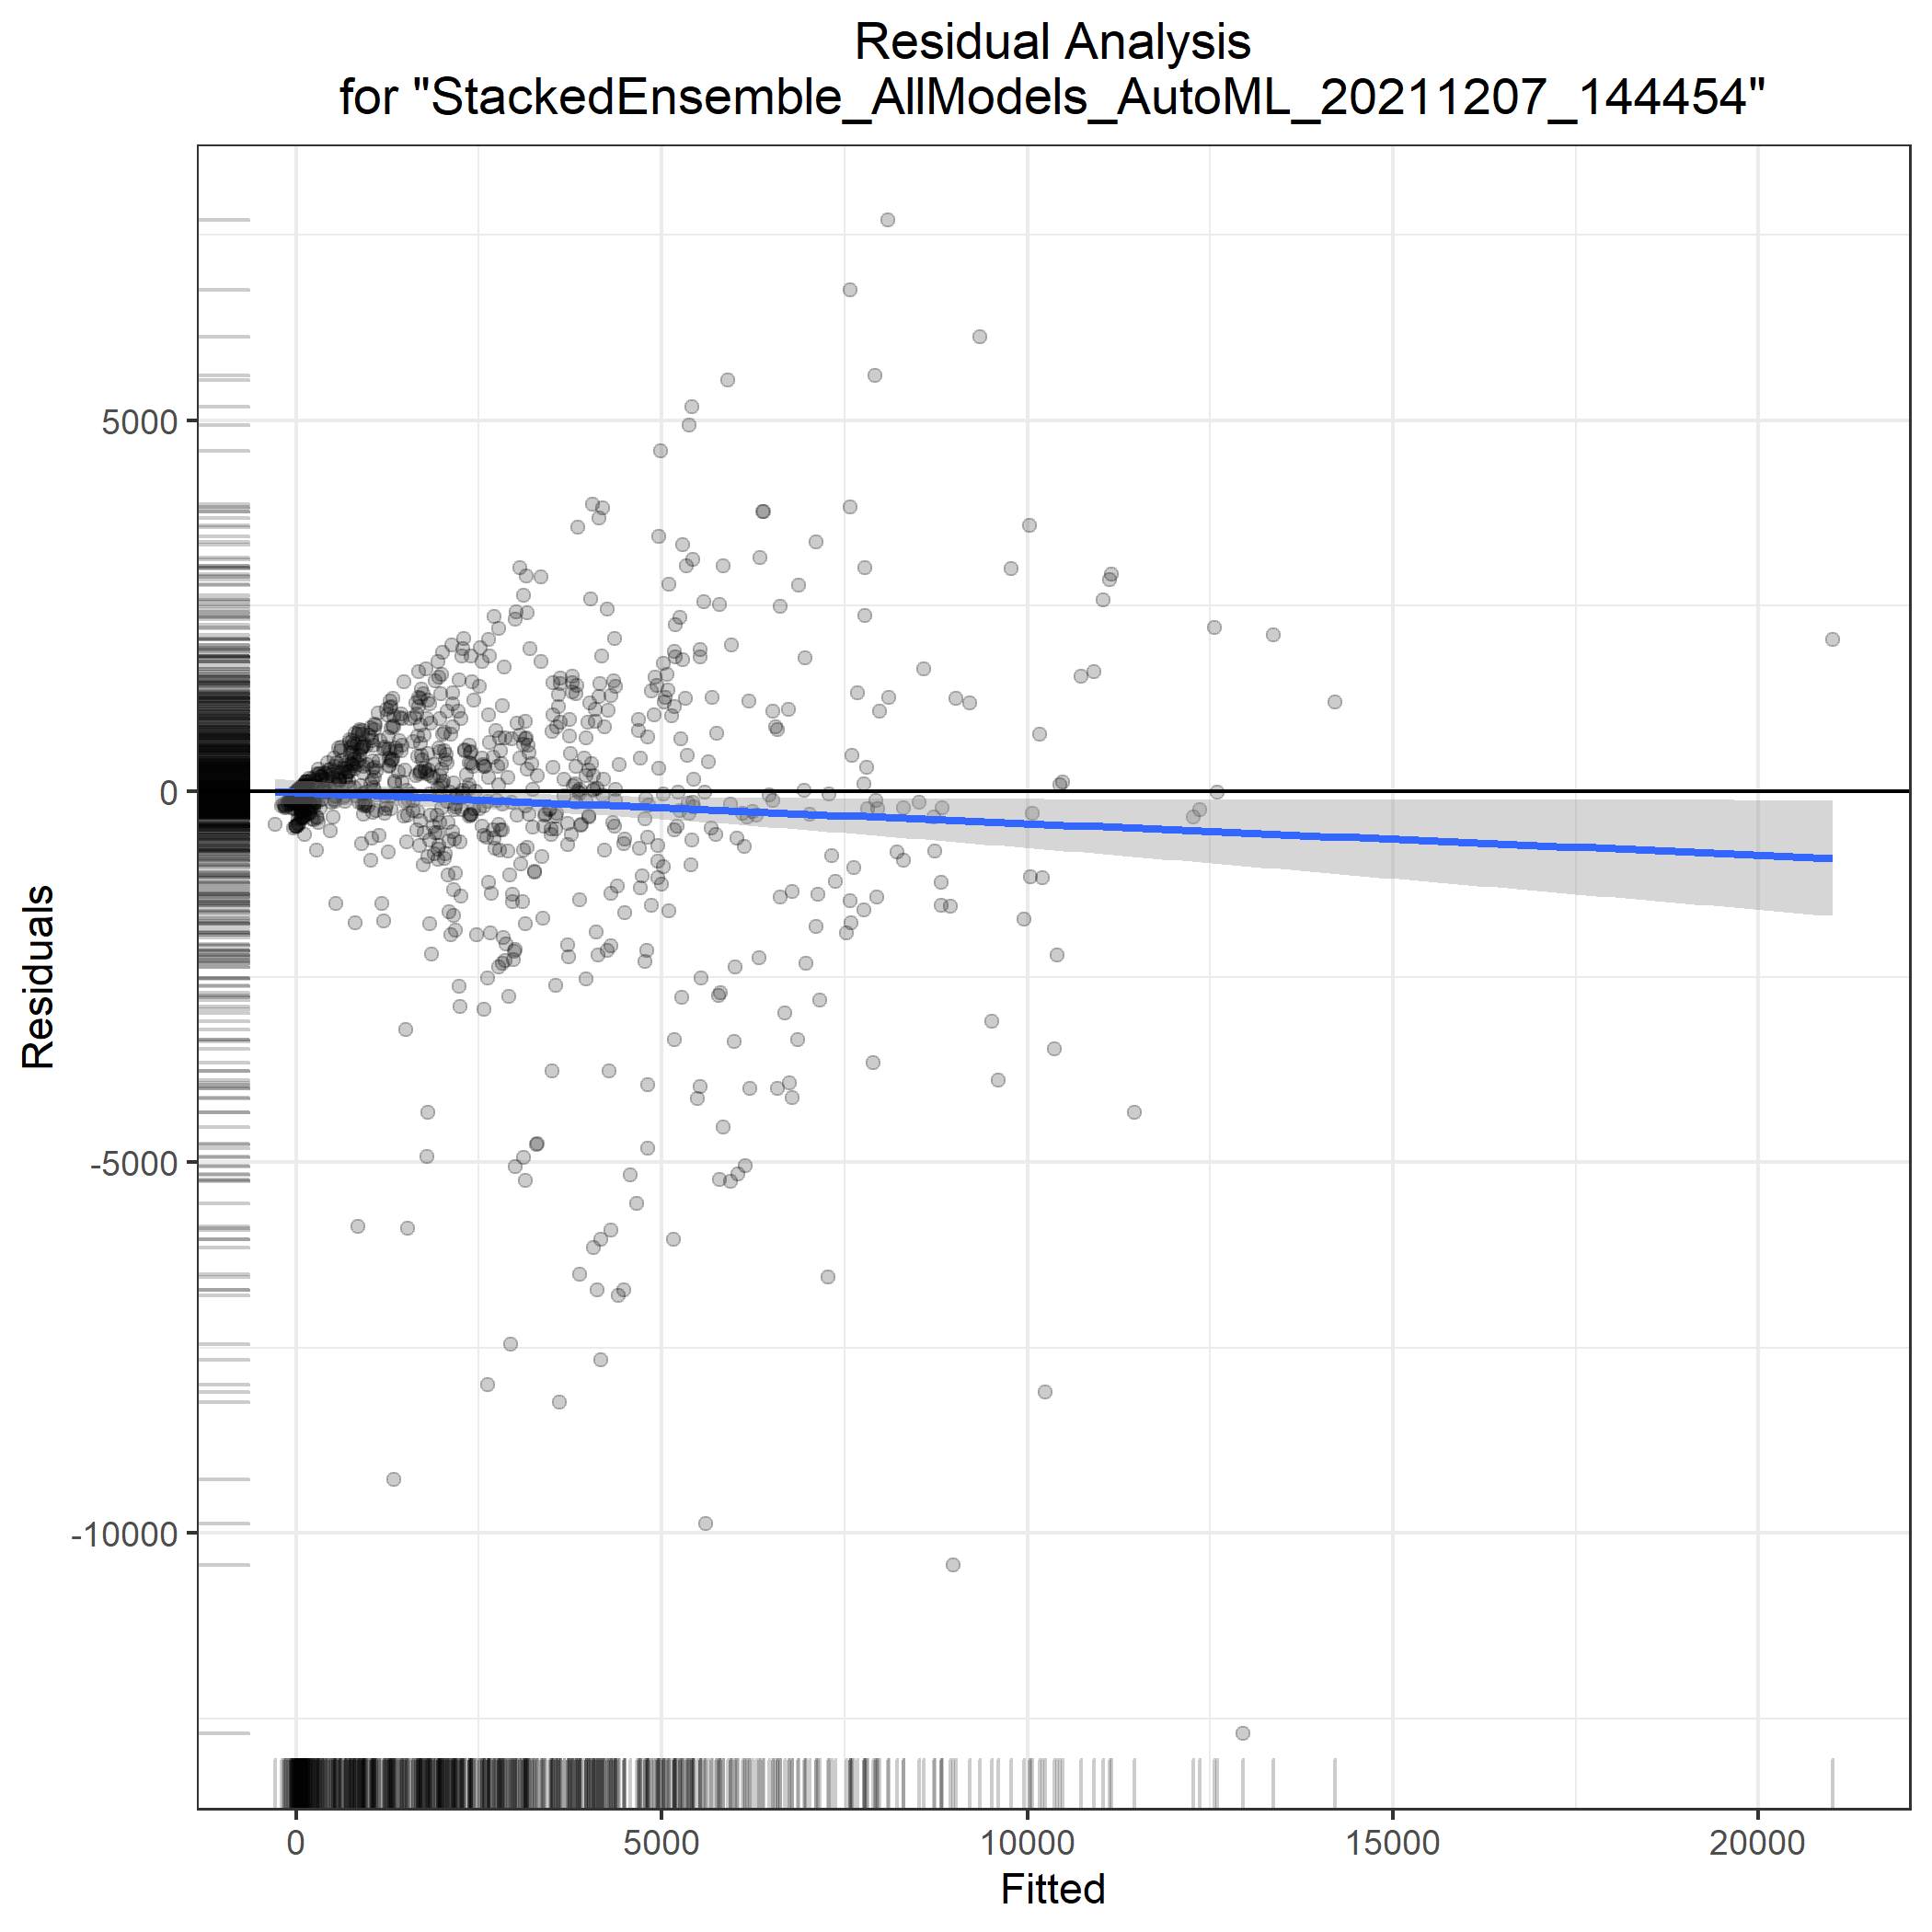

Variable Importance

The variable importance plot shows the relative importance of the most important variables in the model.

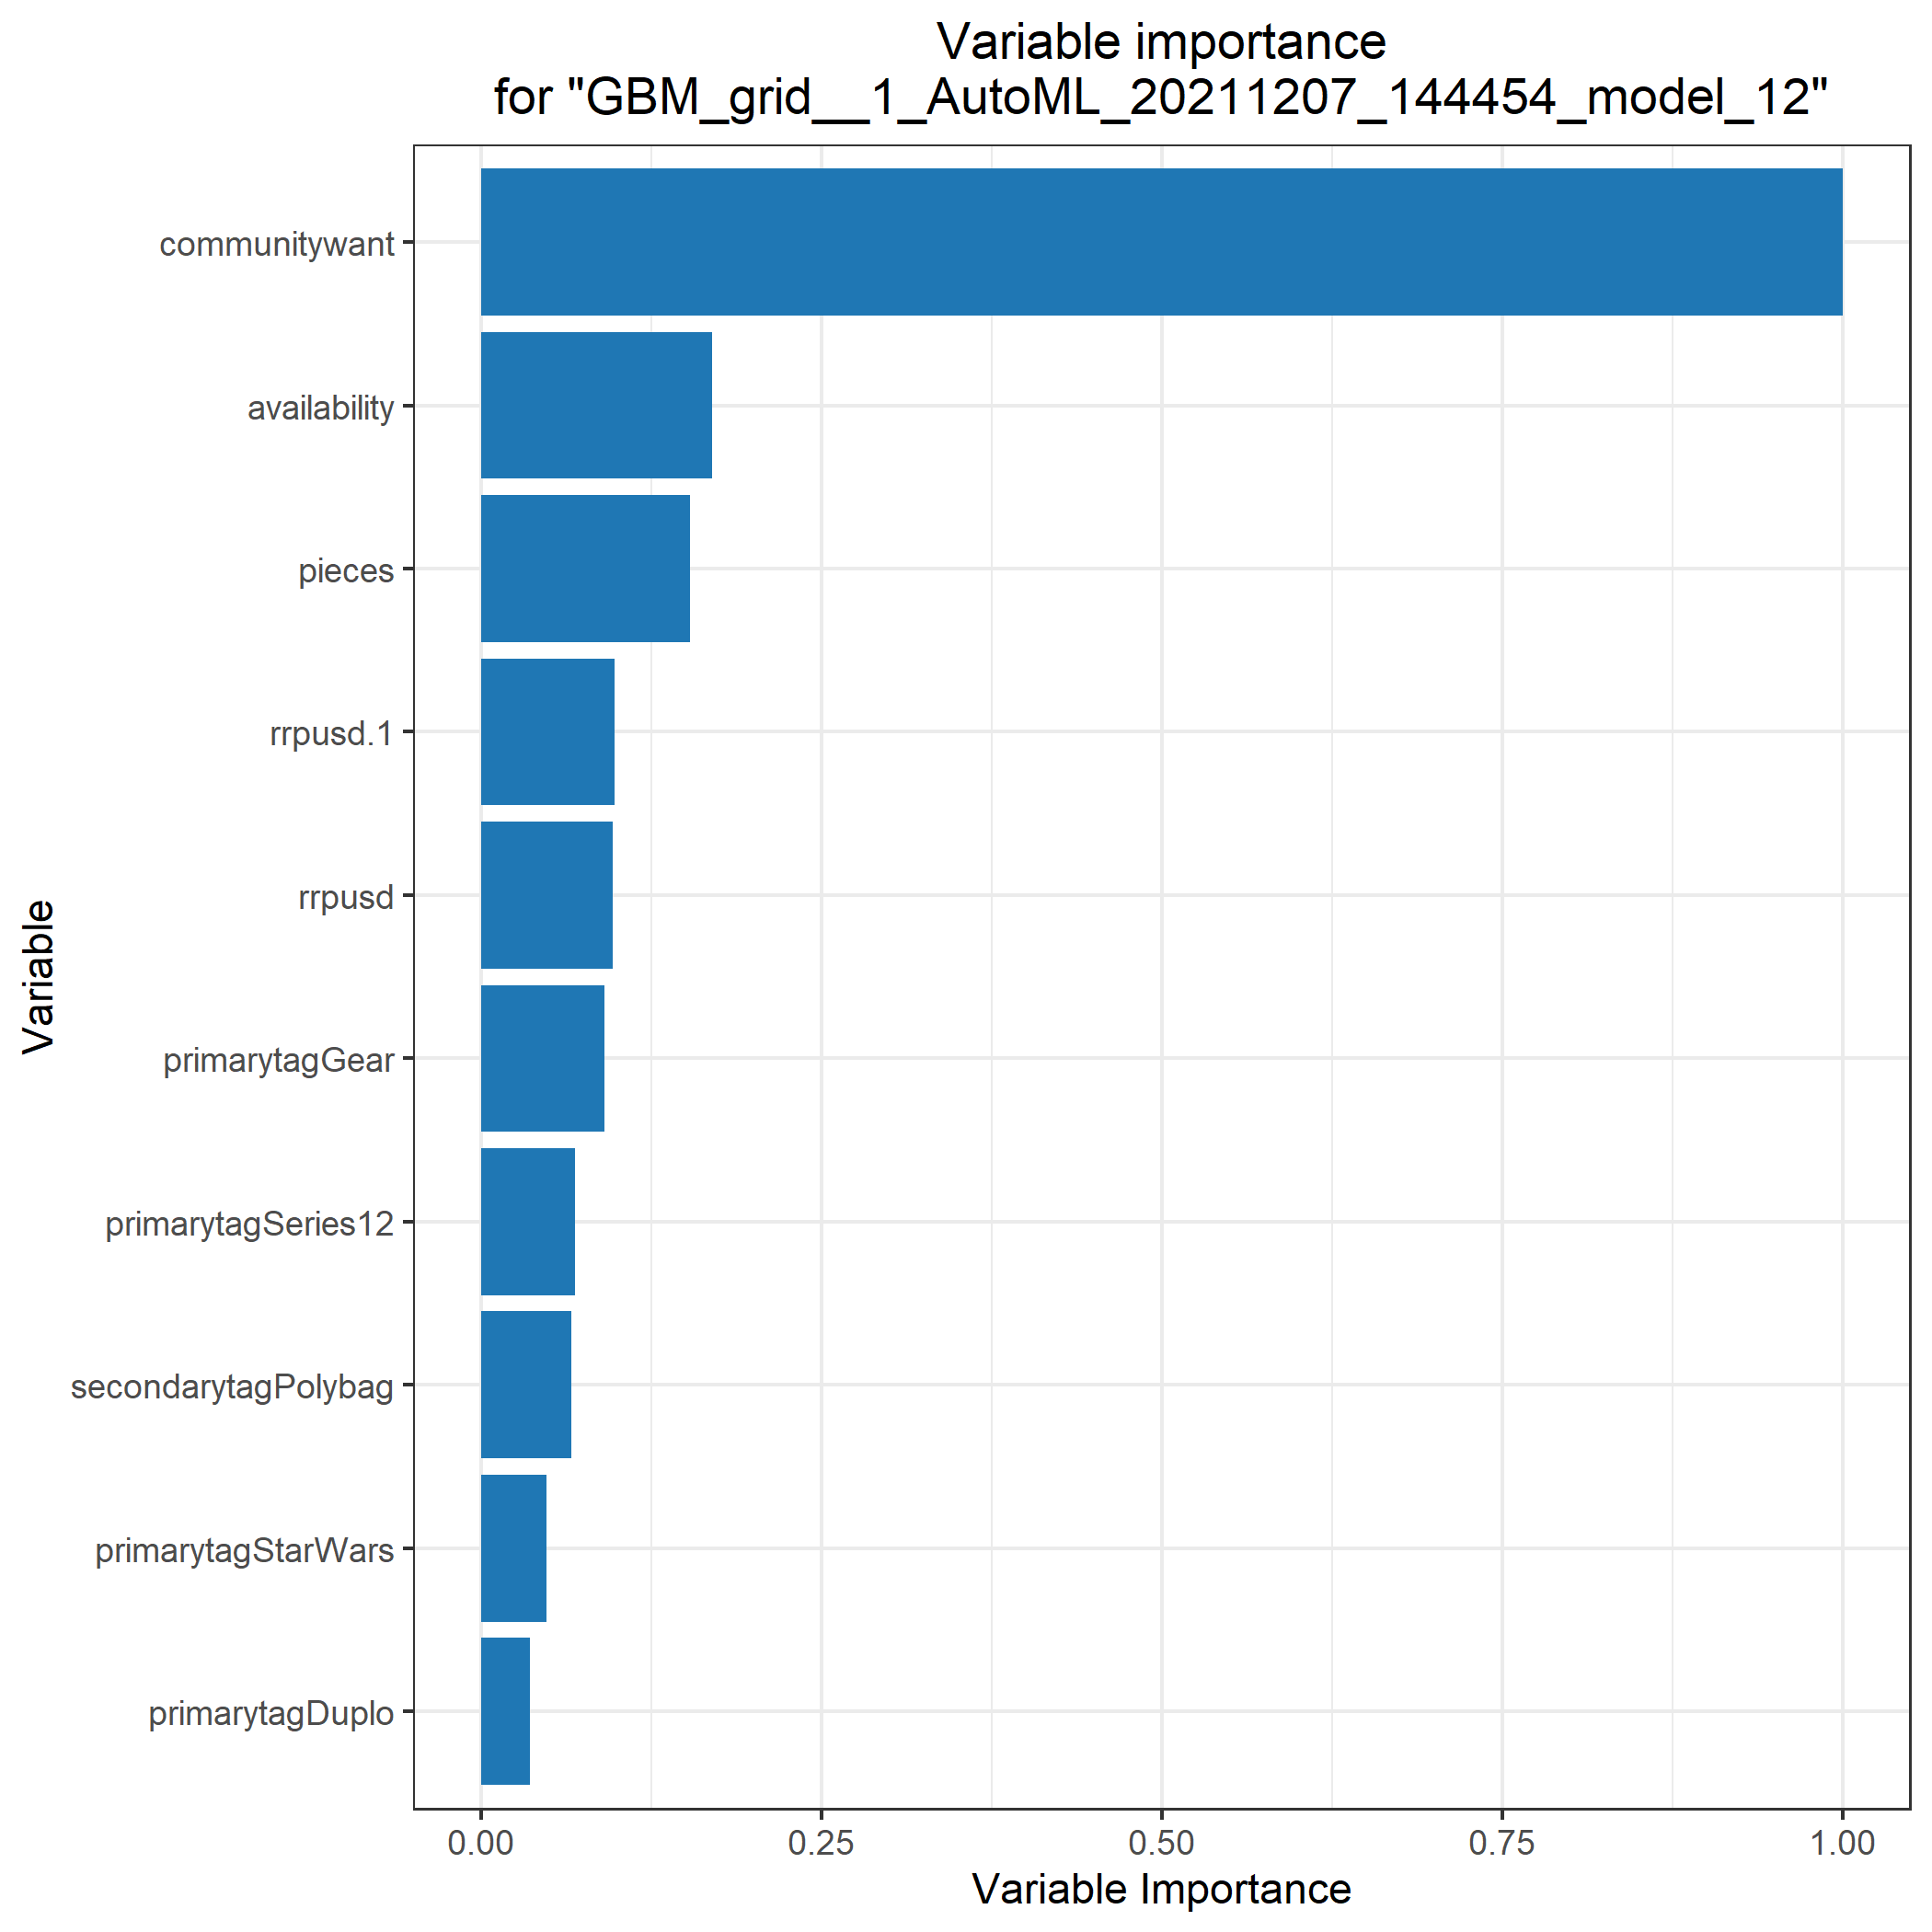

Variable Importance Heatmap

Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

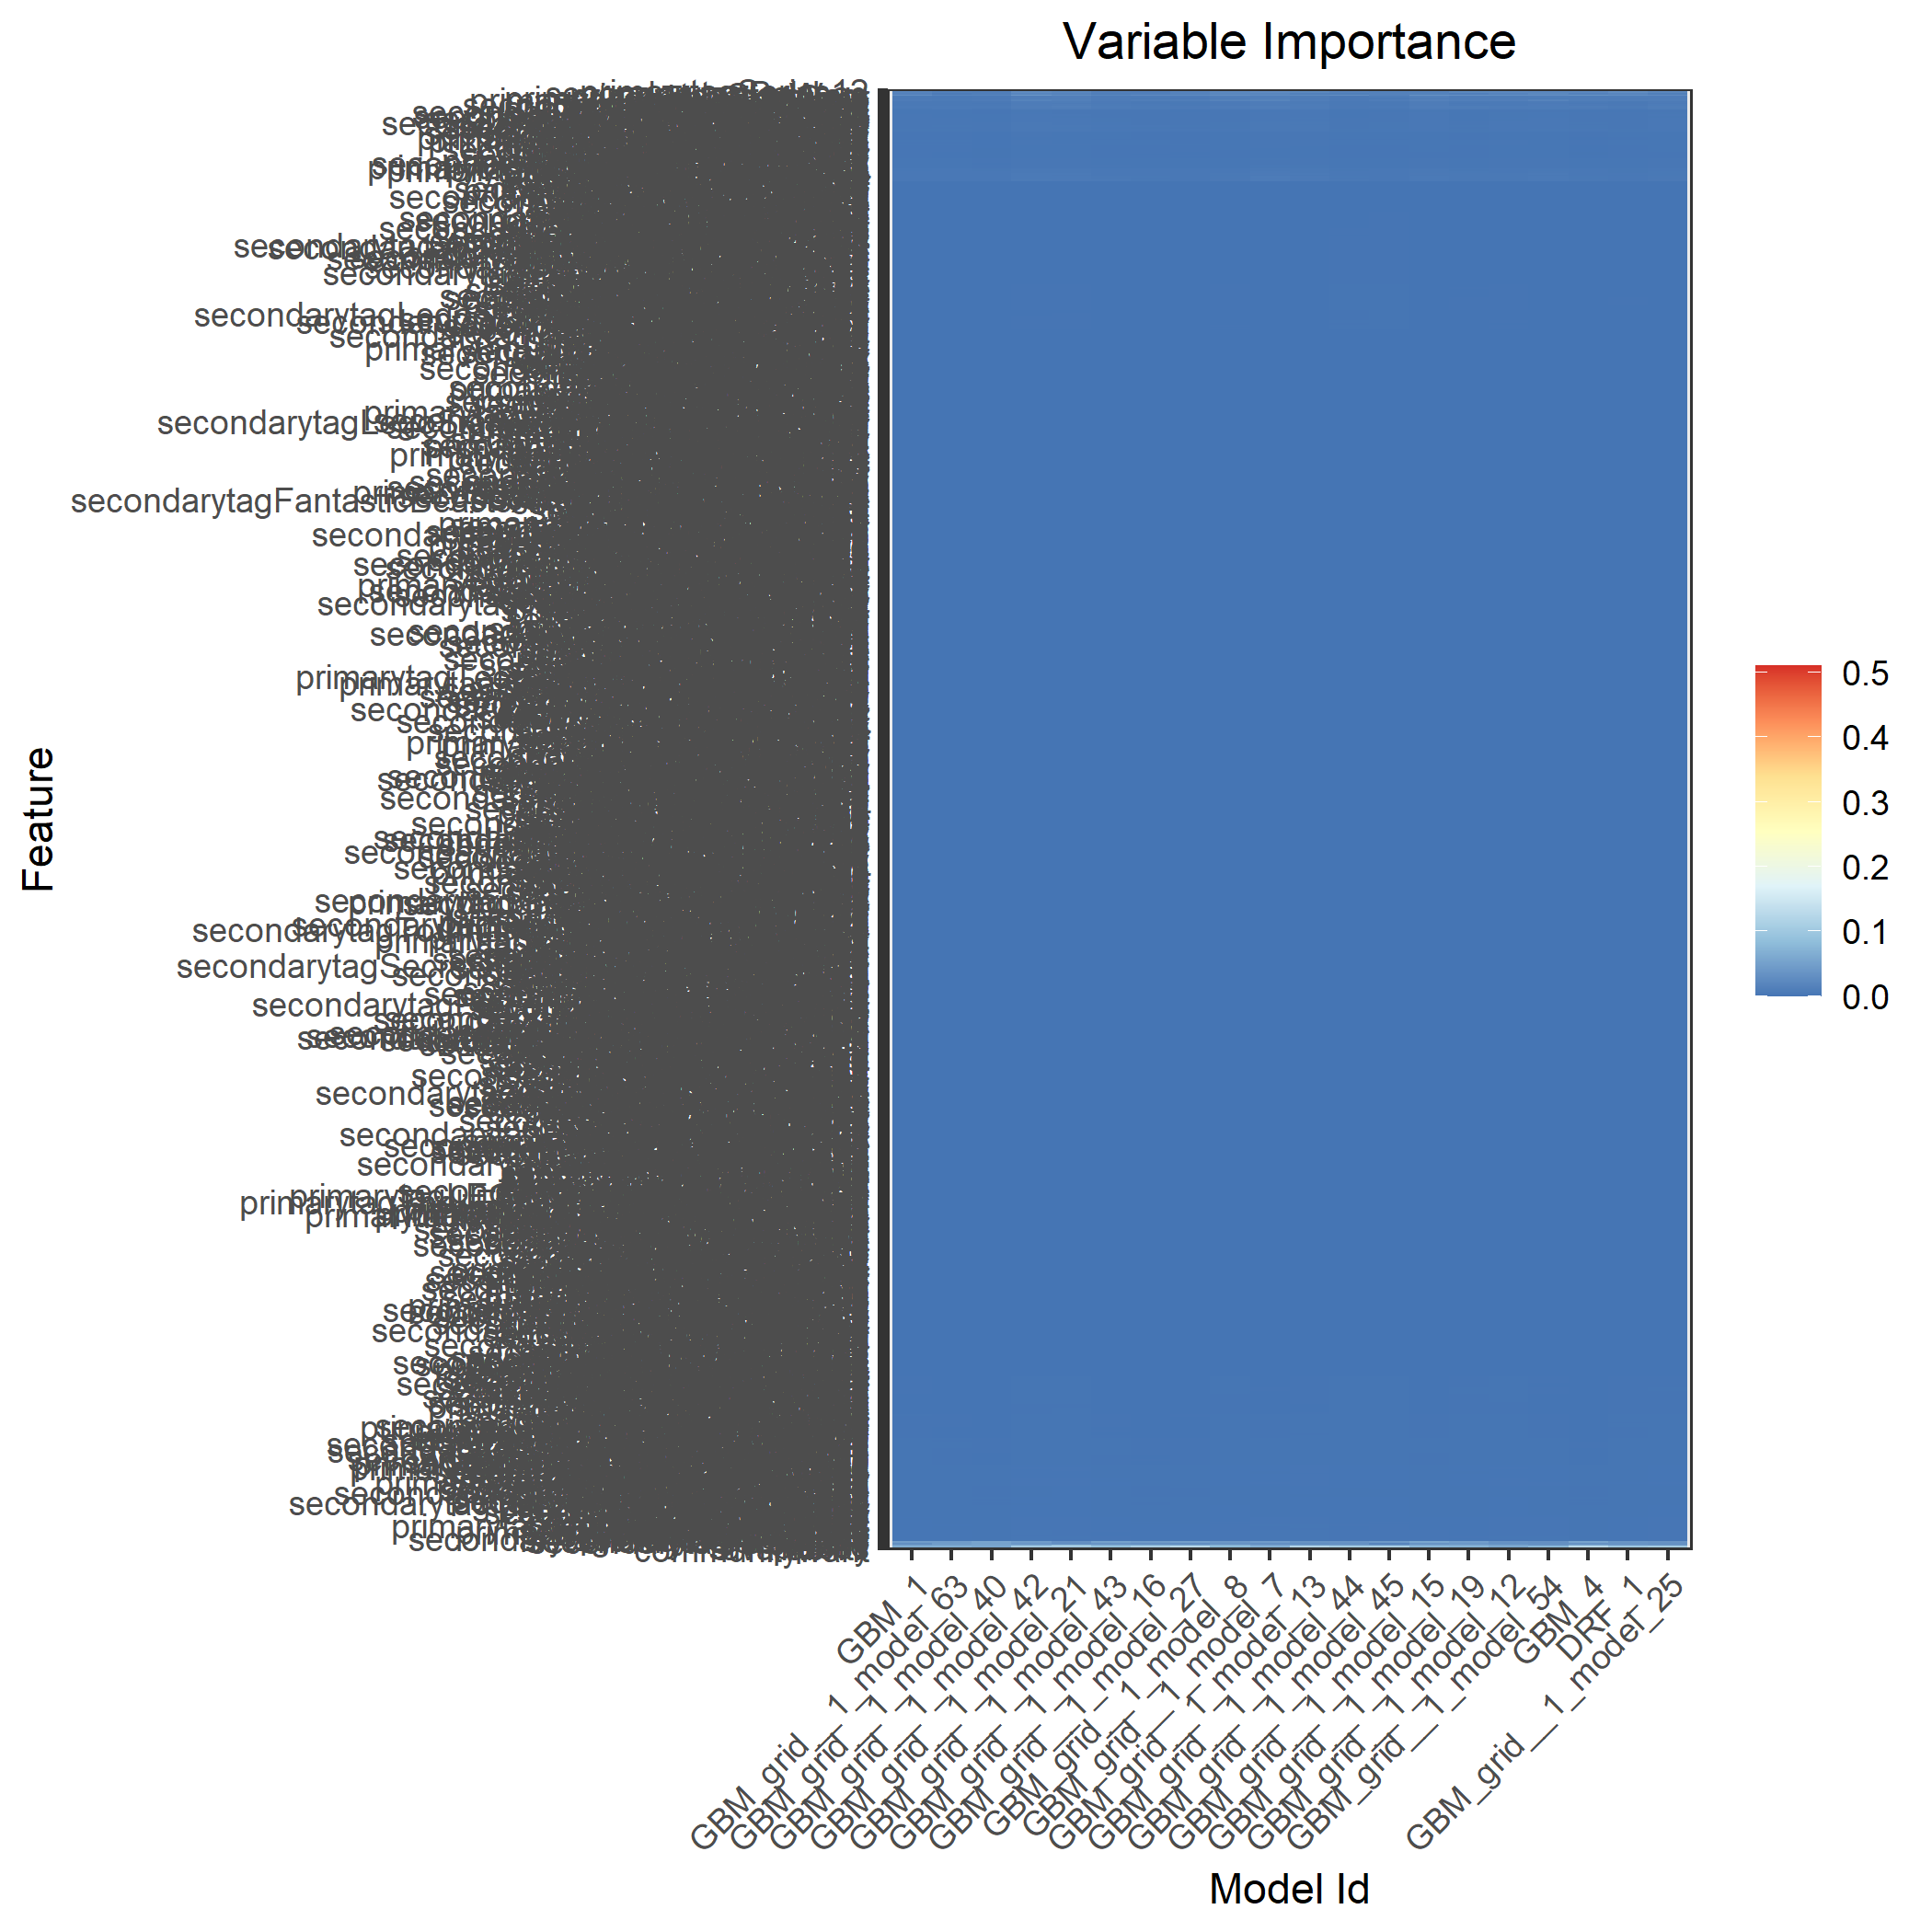

Model Correlation

This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering).

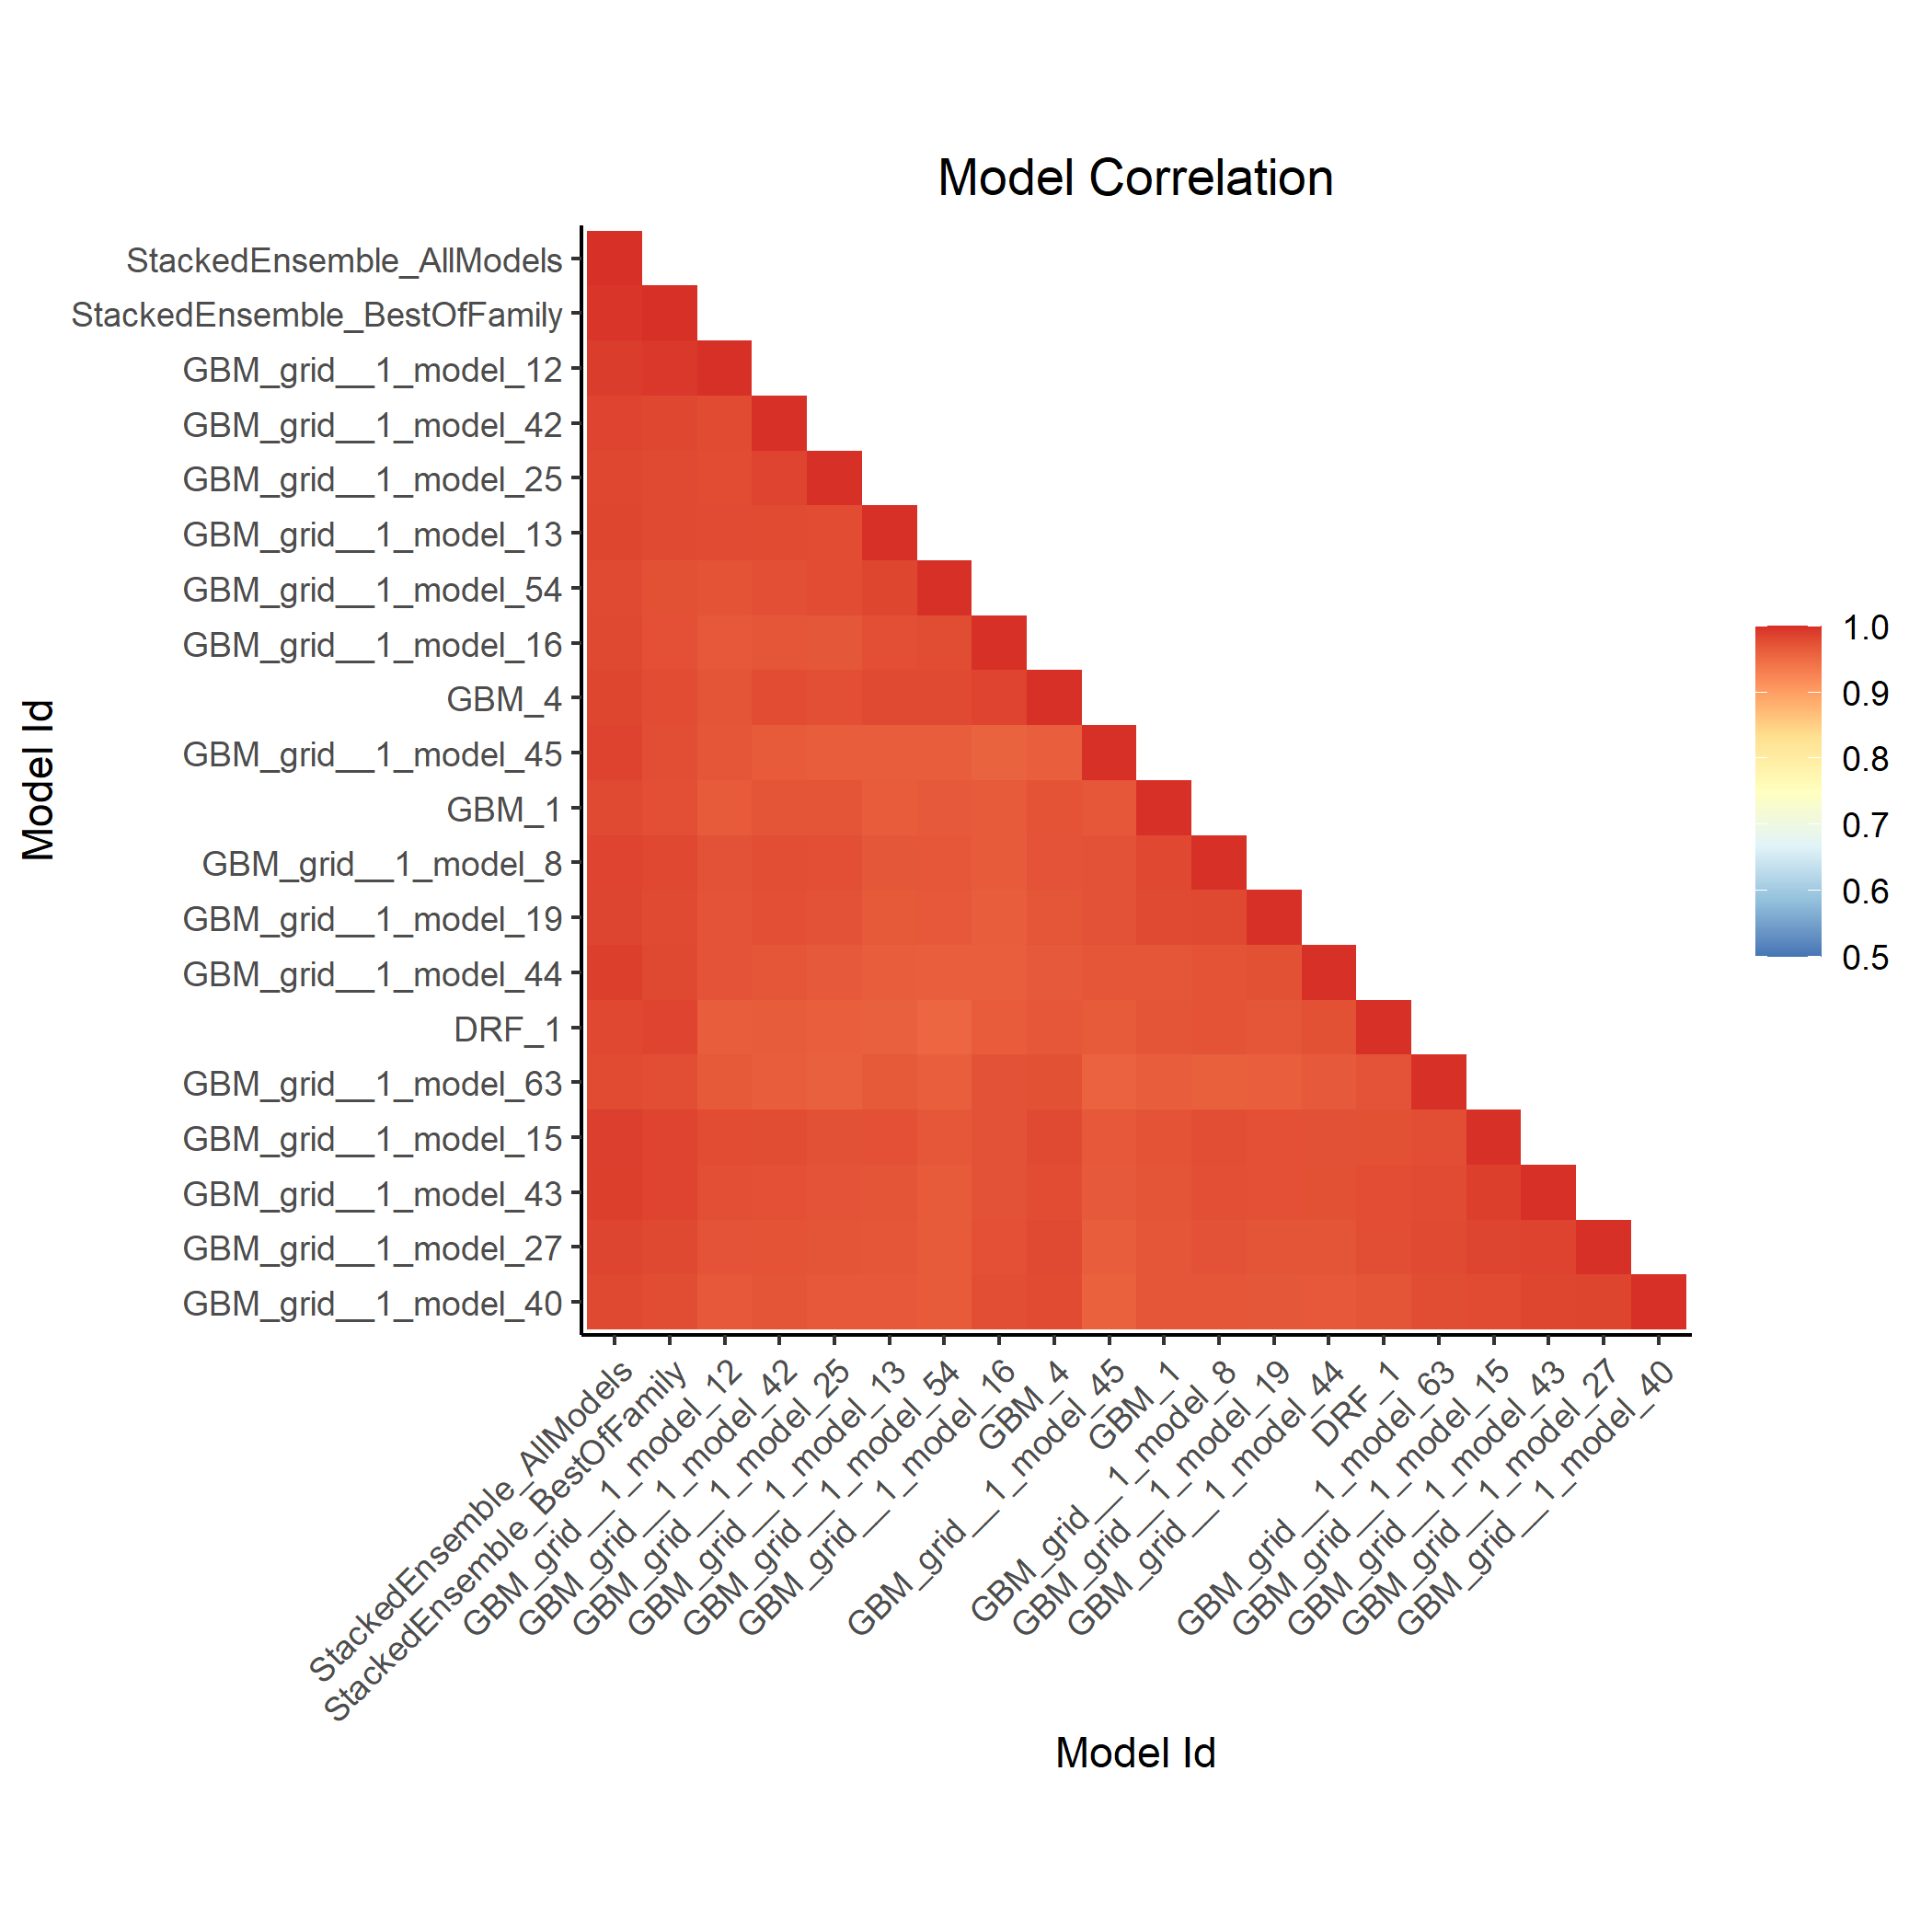

[1] "Interpretable models: GLM_1_AutoML_20211207_144454"

SHAP Summary

SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

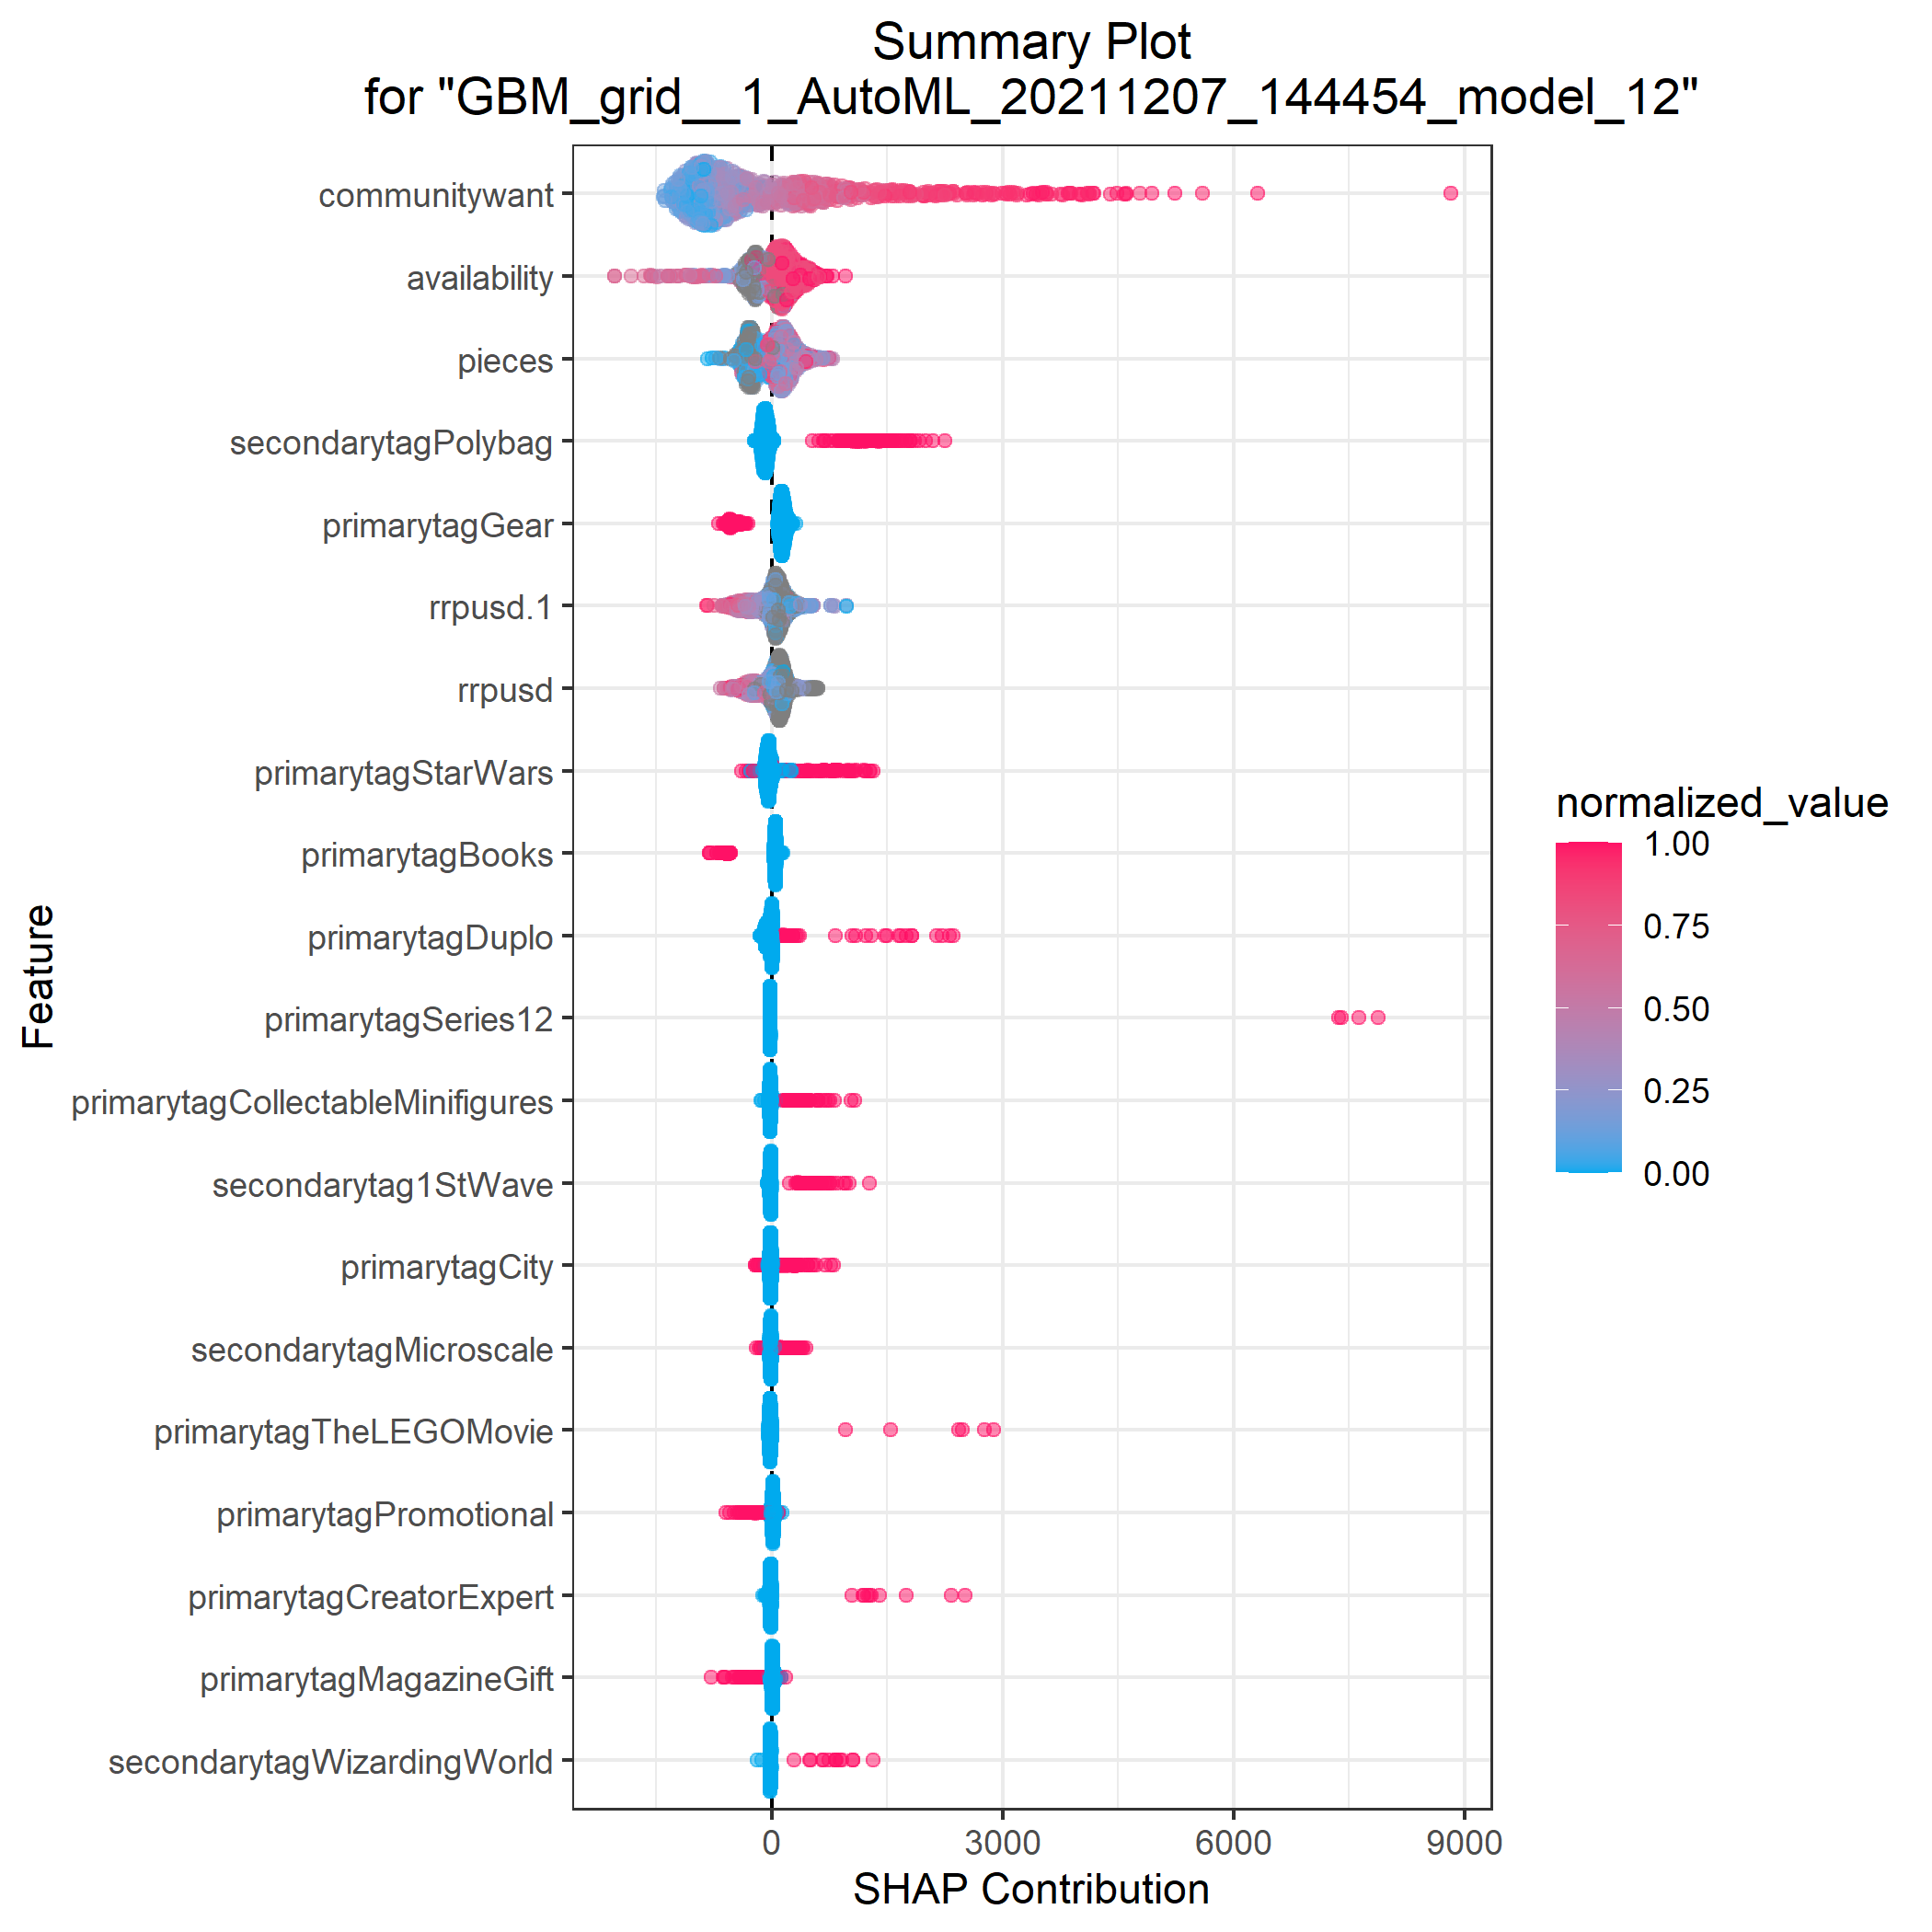

Partial Dependence Plots

Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

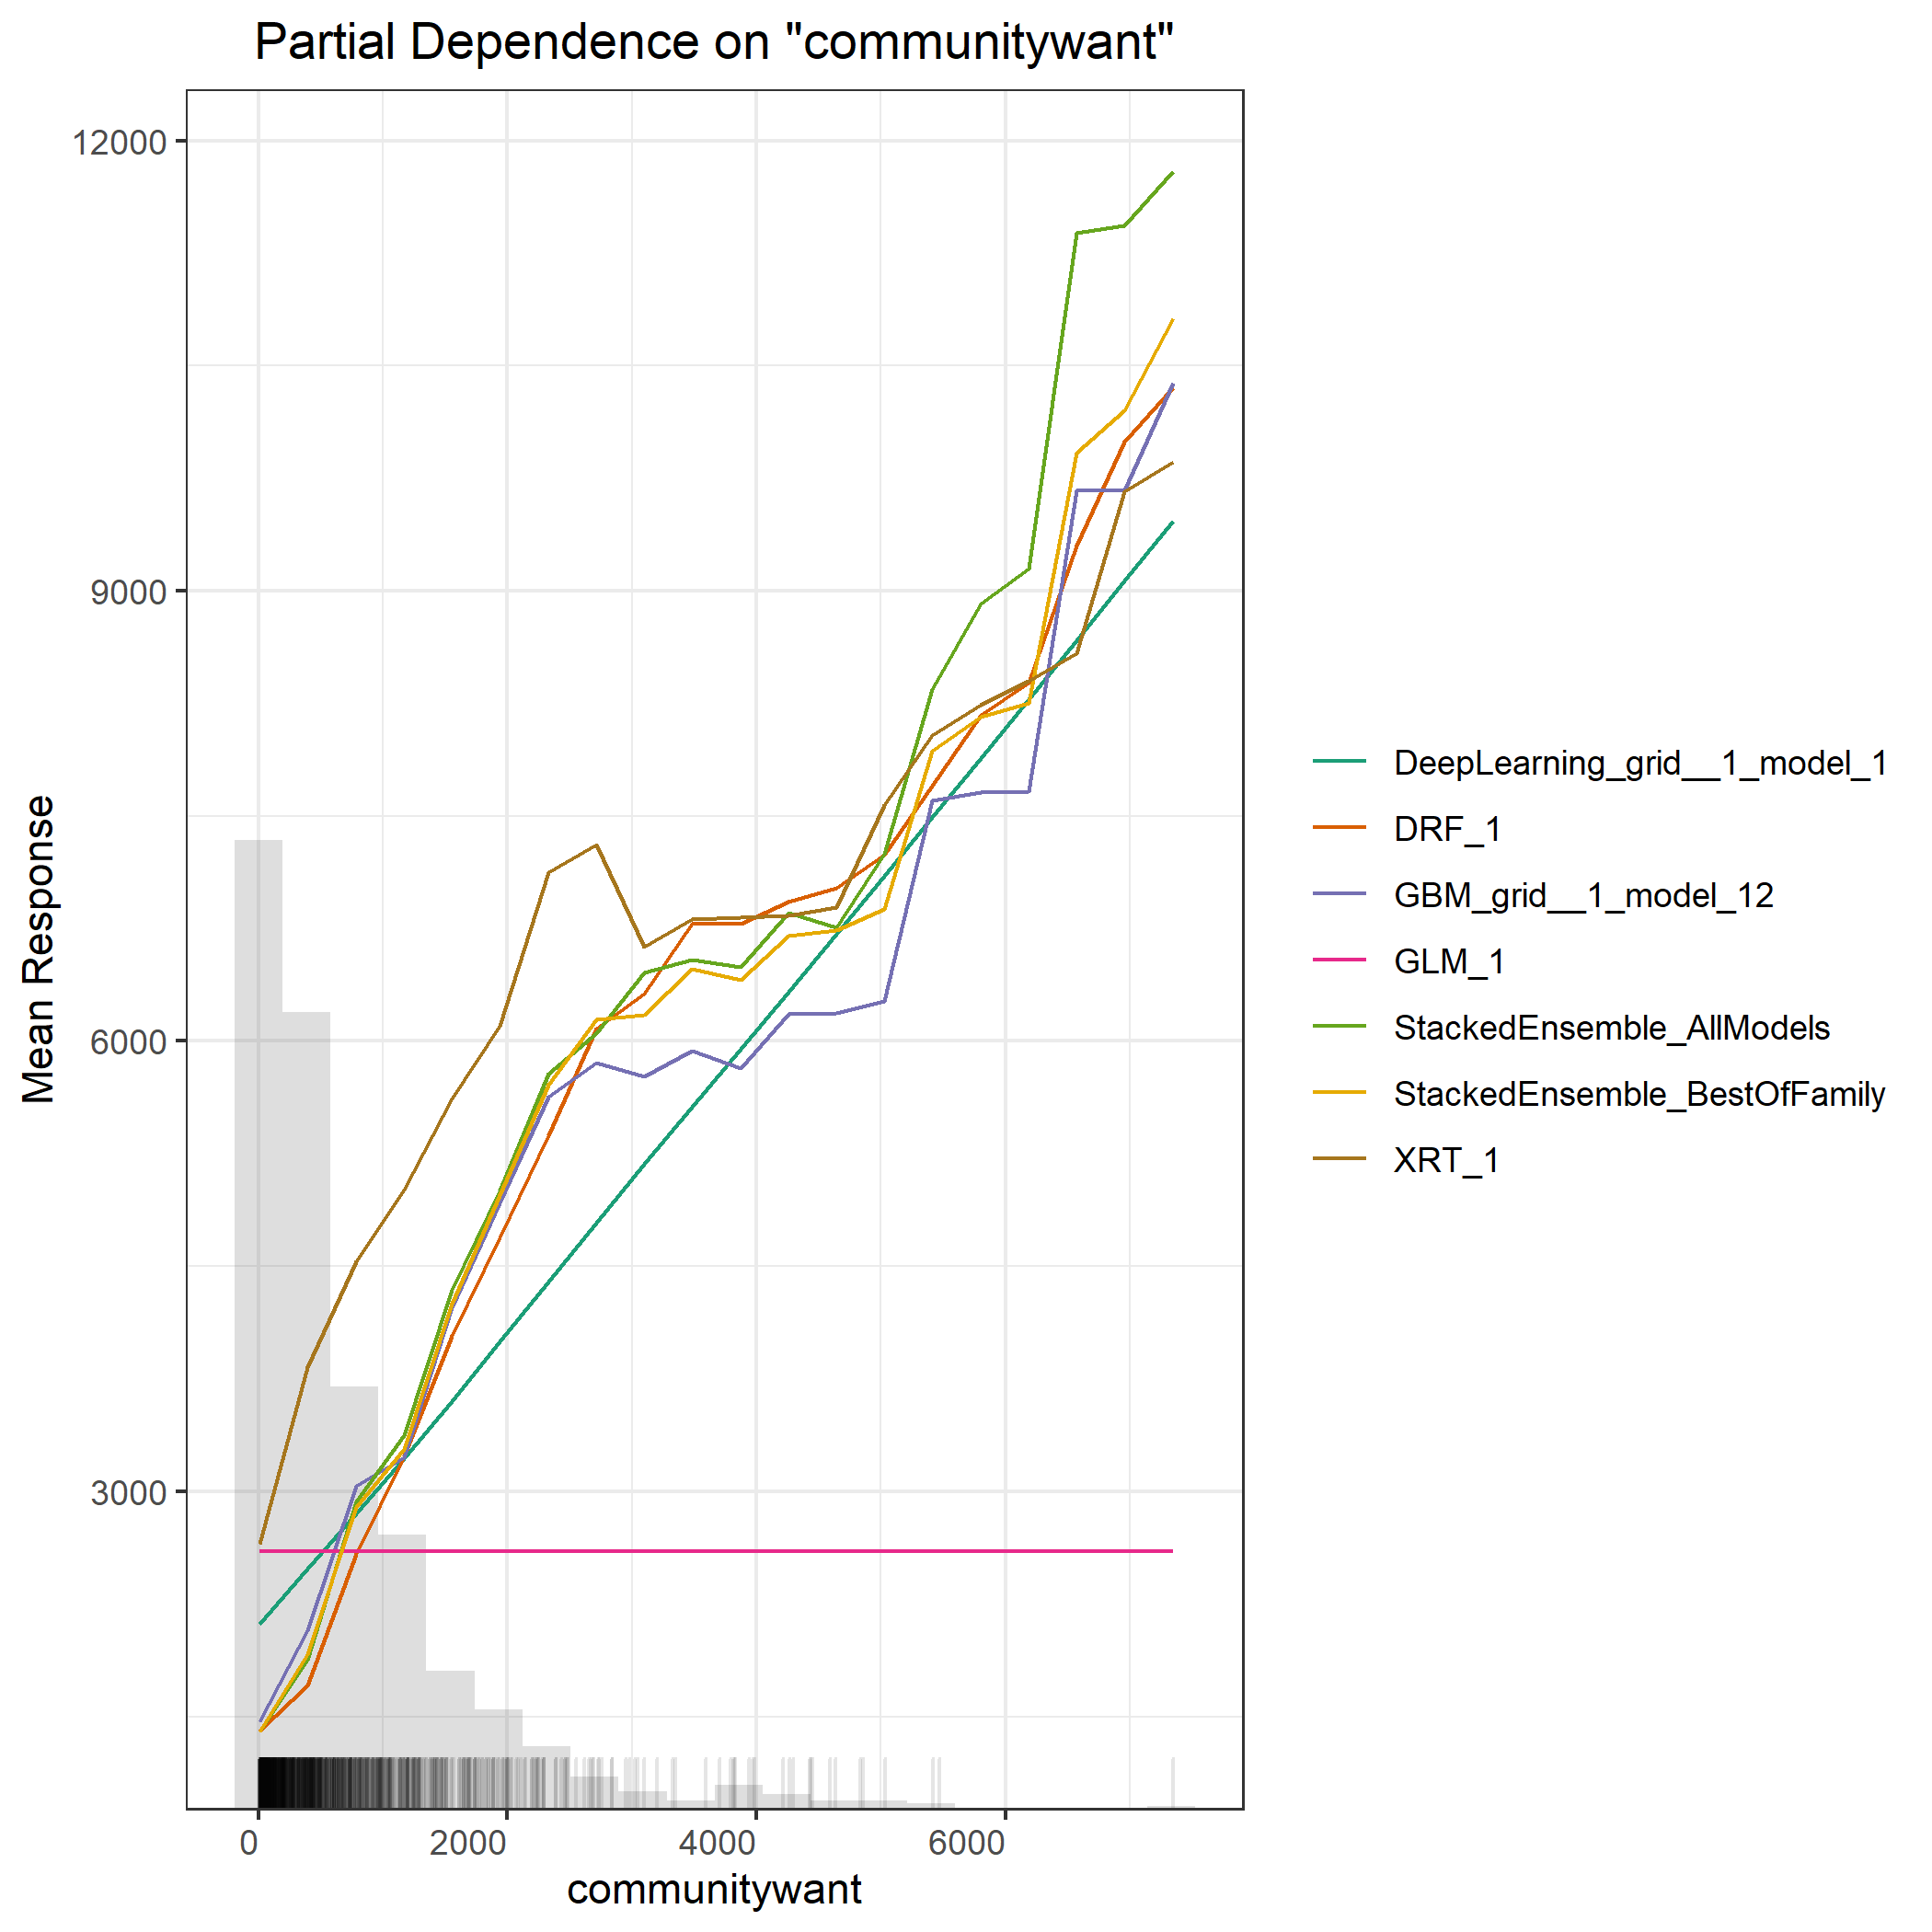

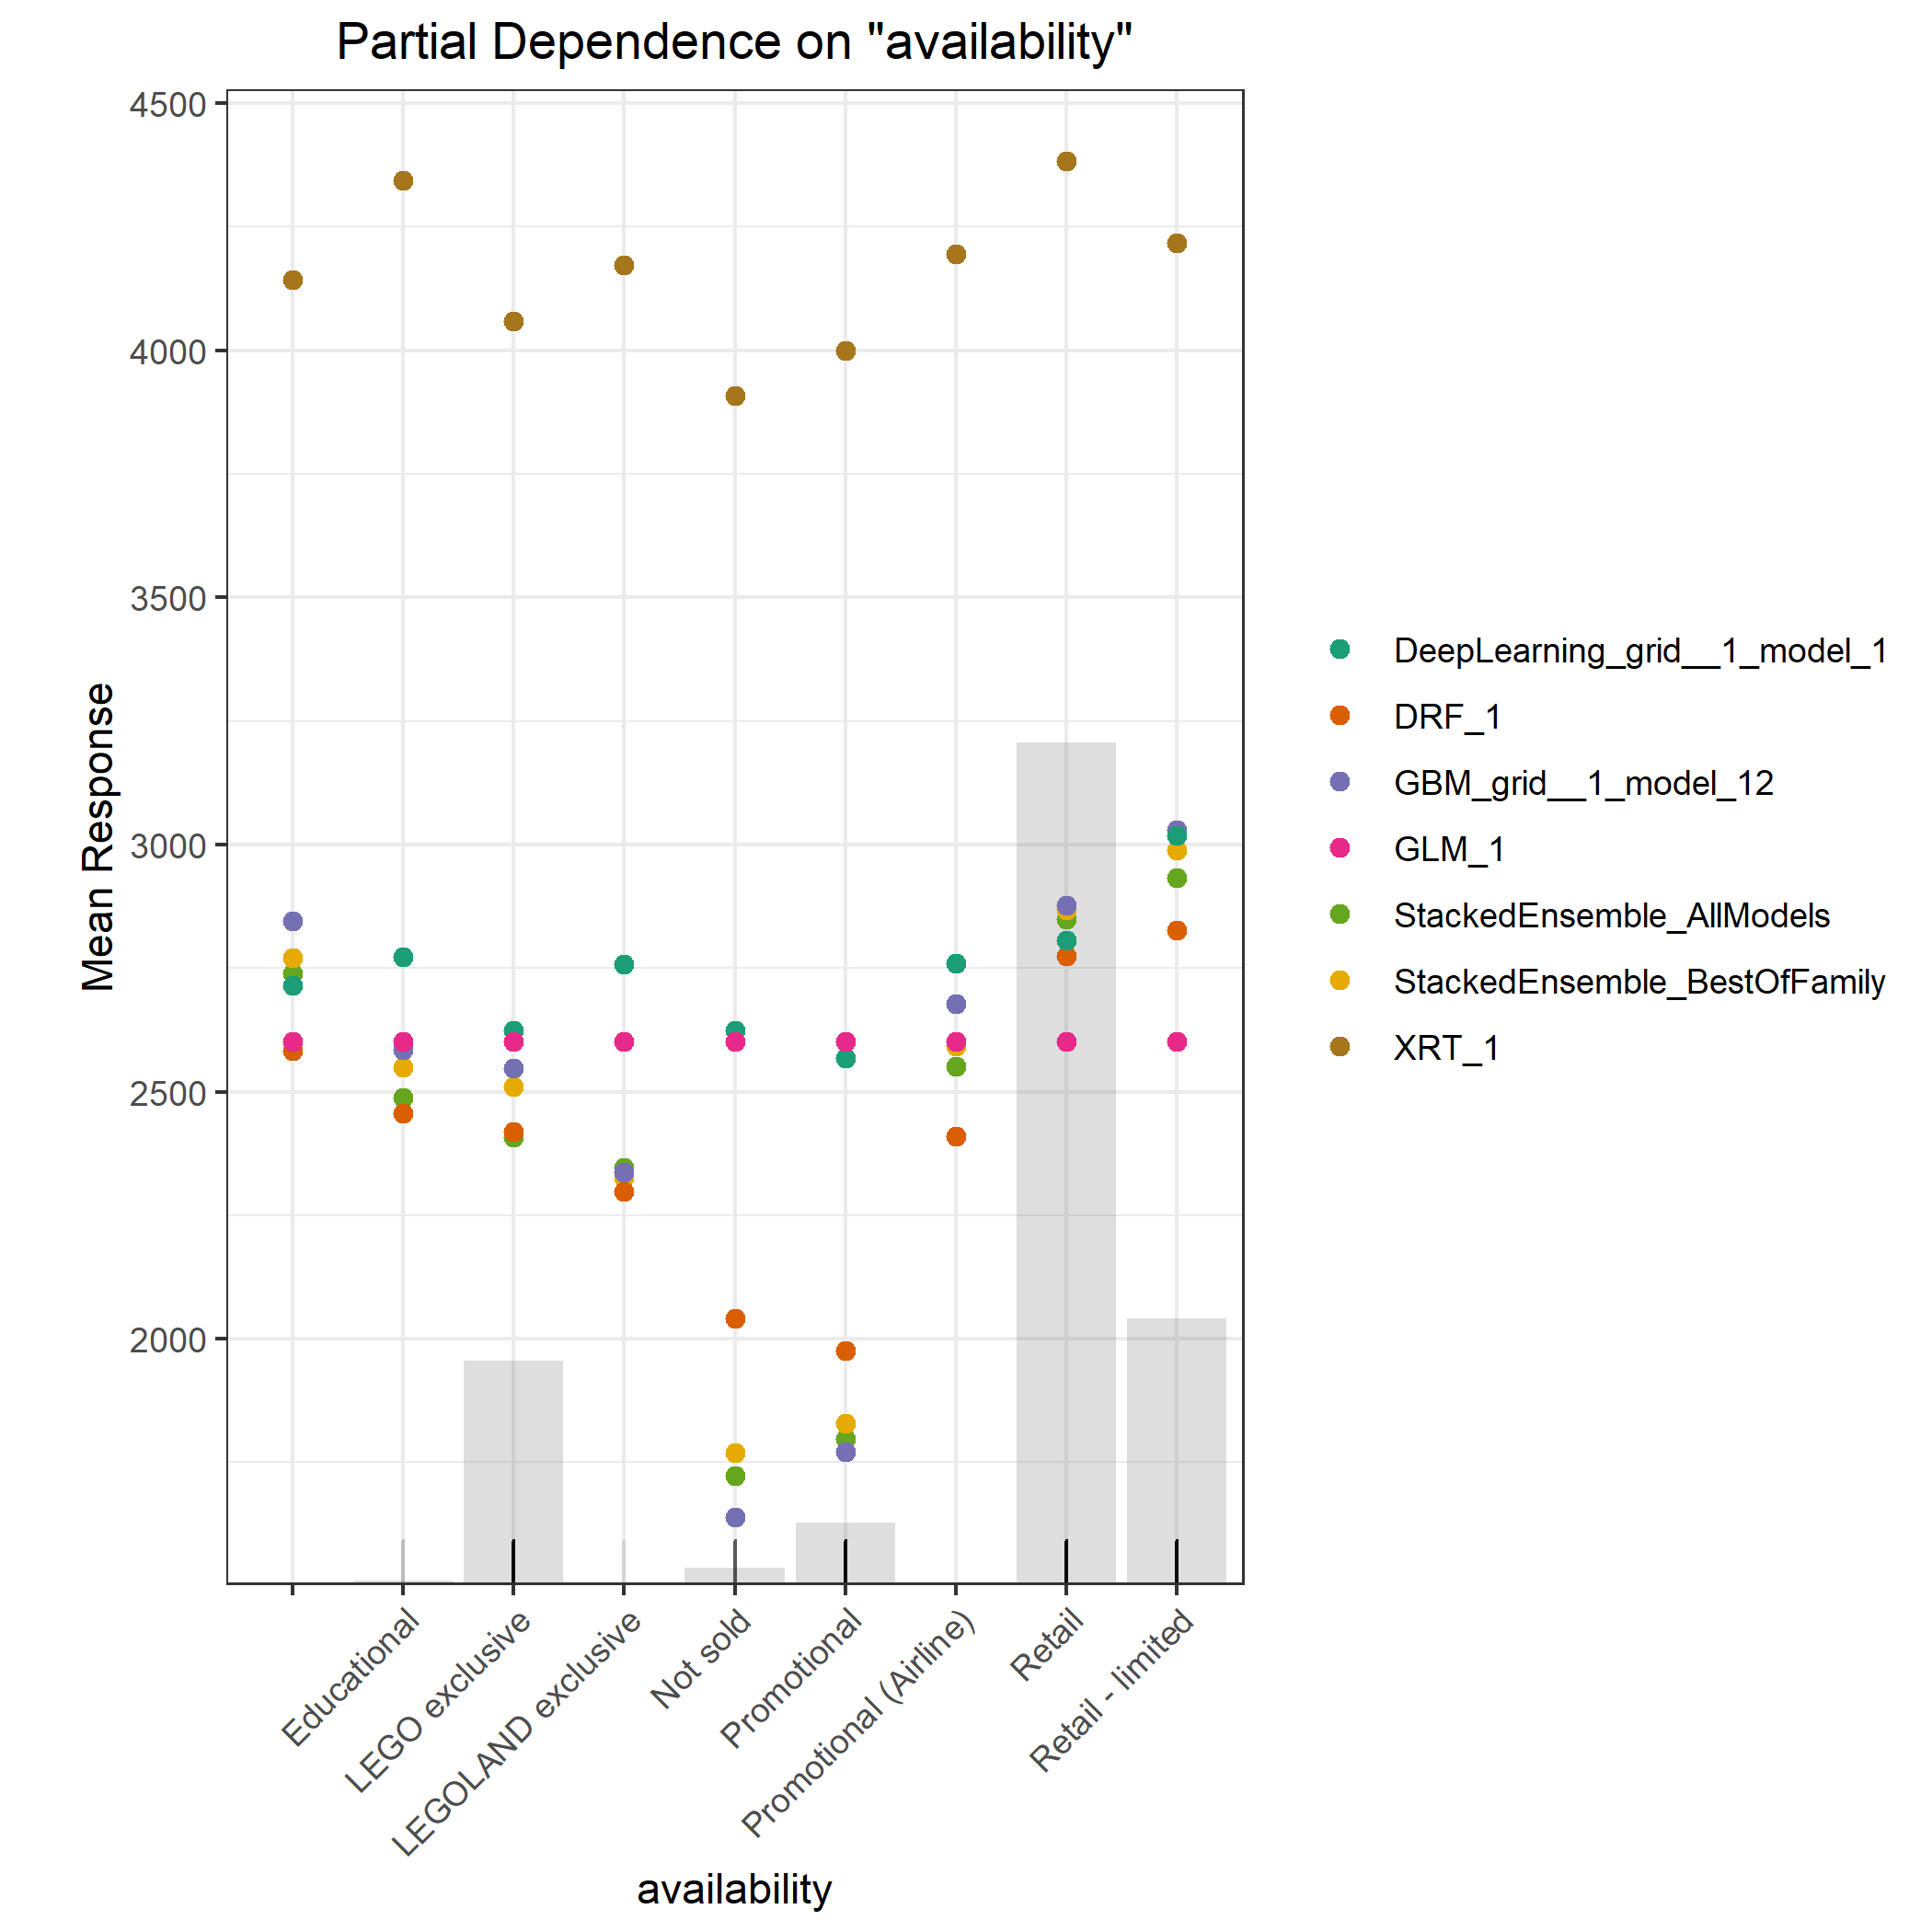

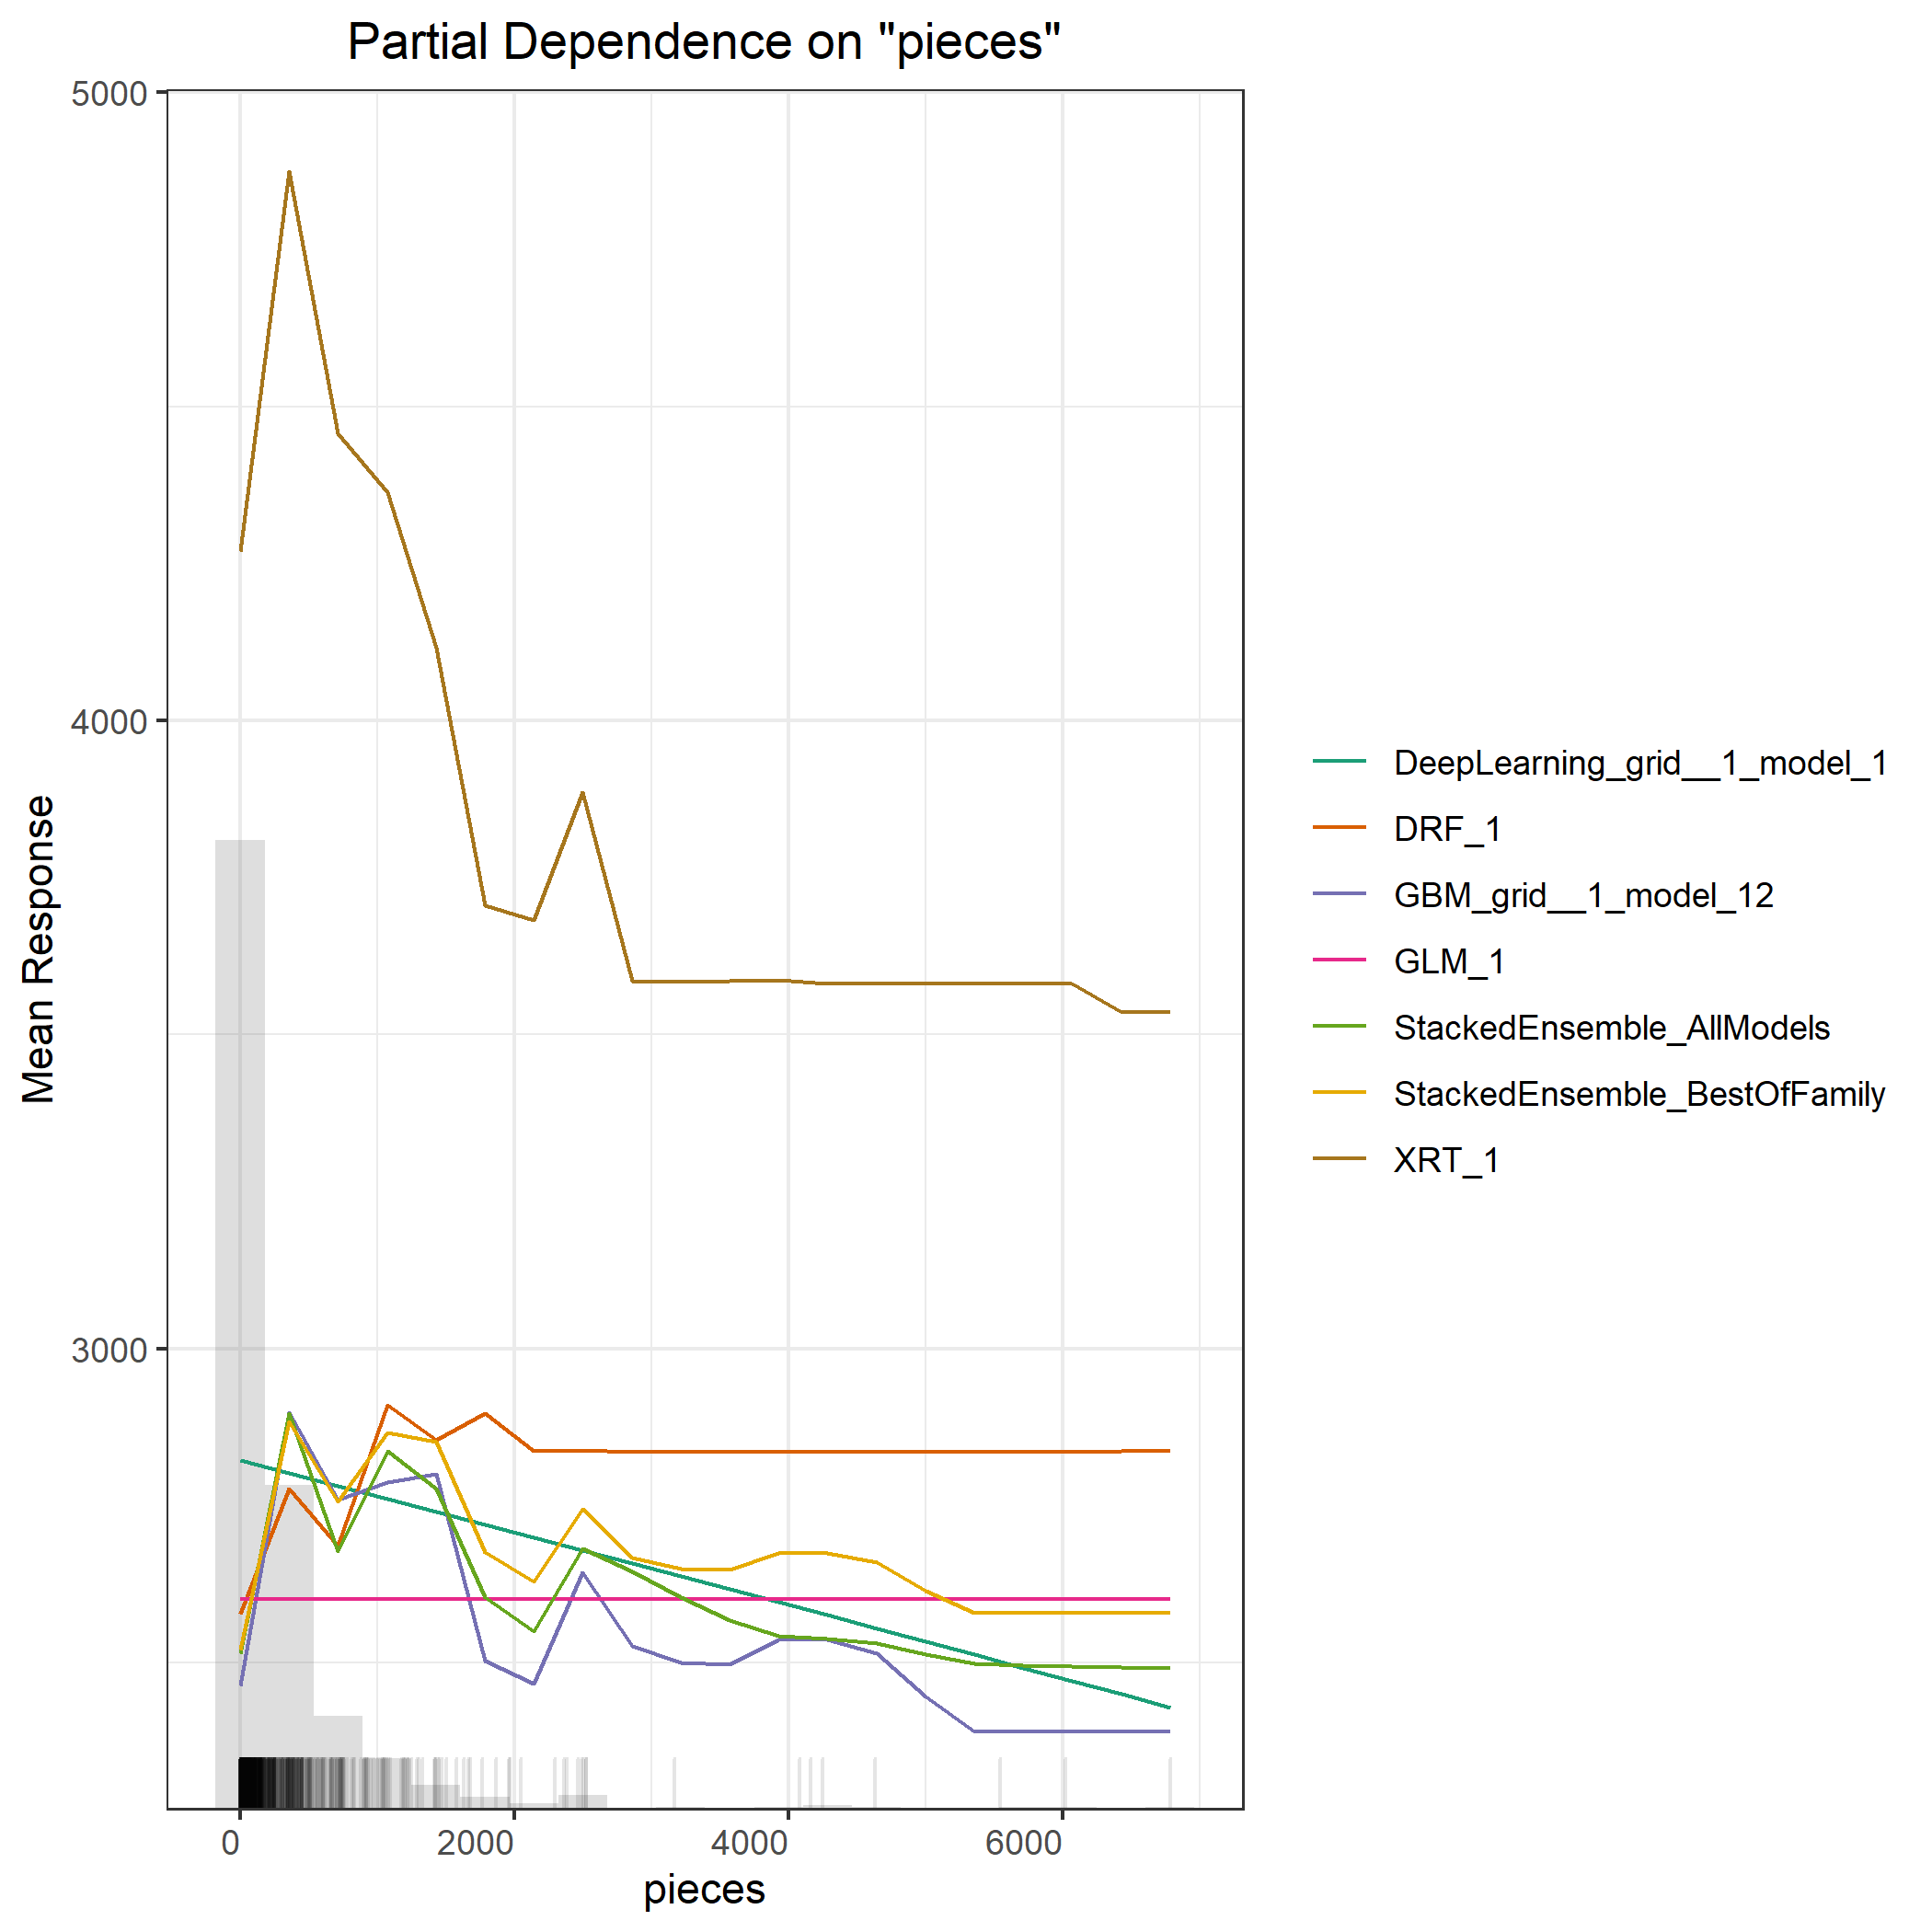

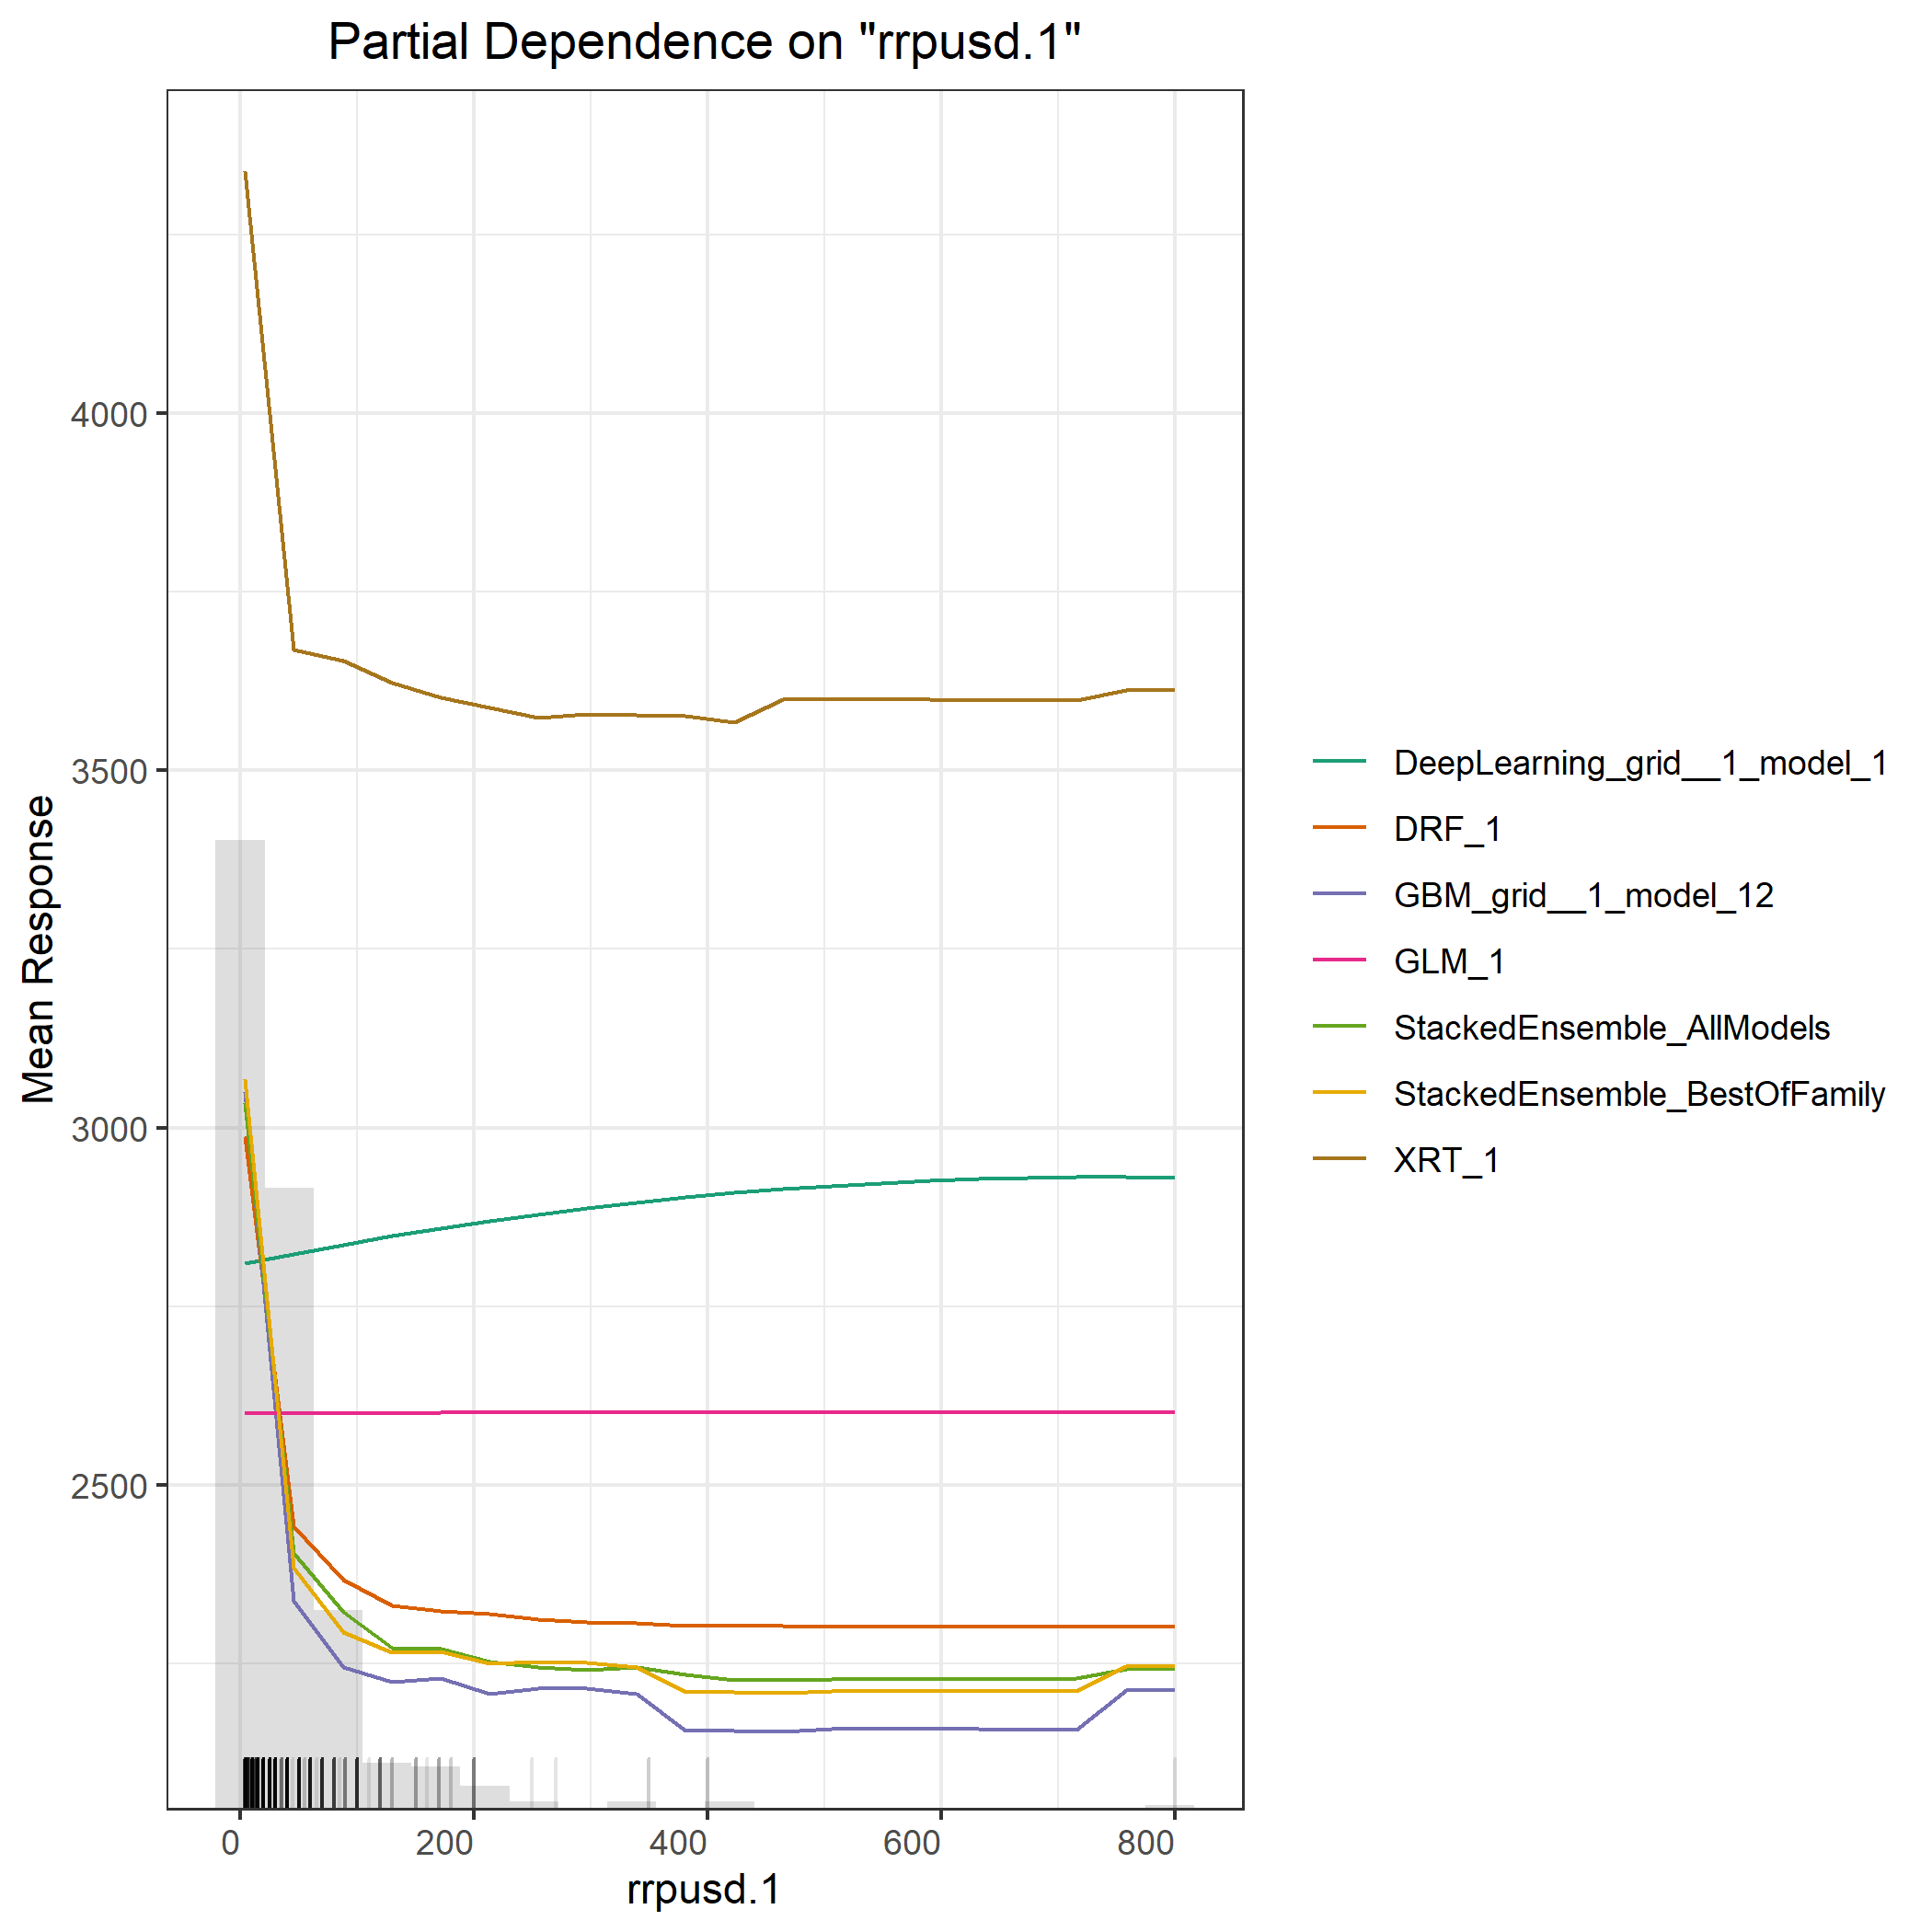

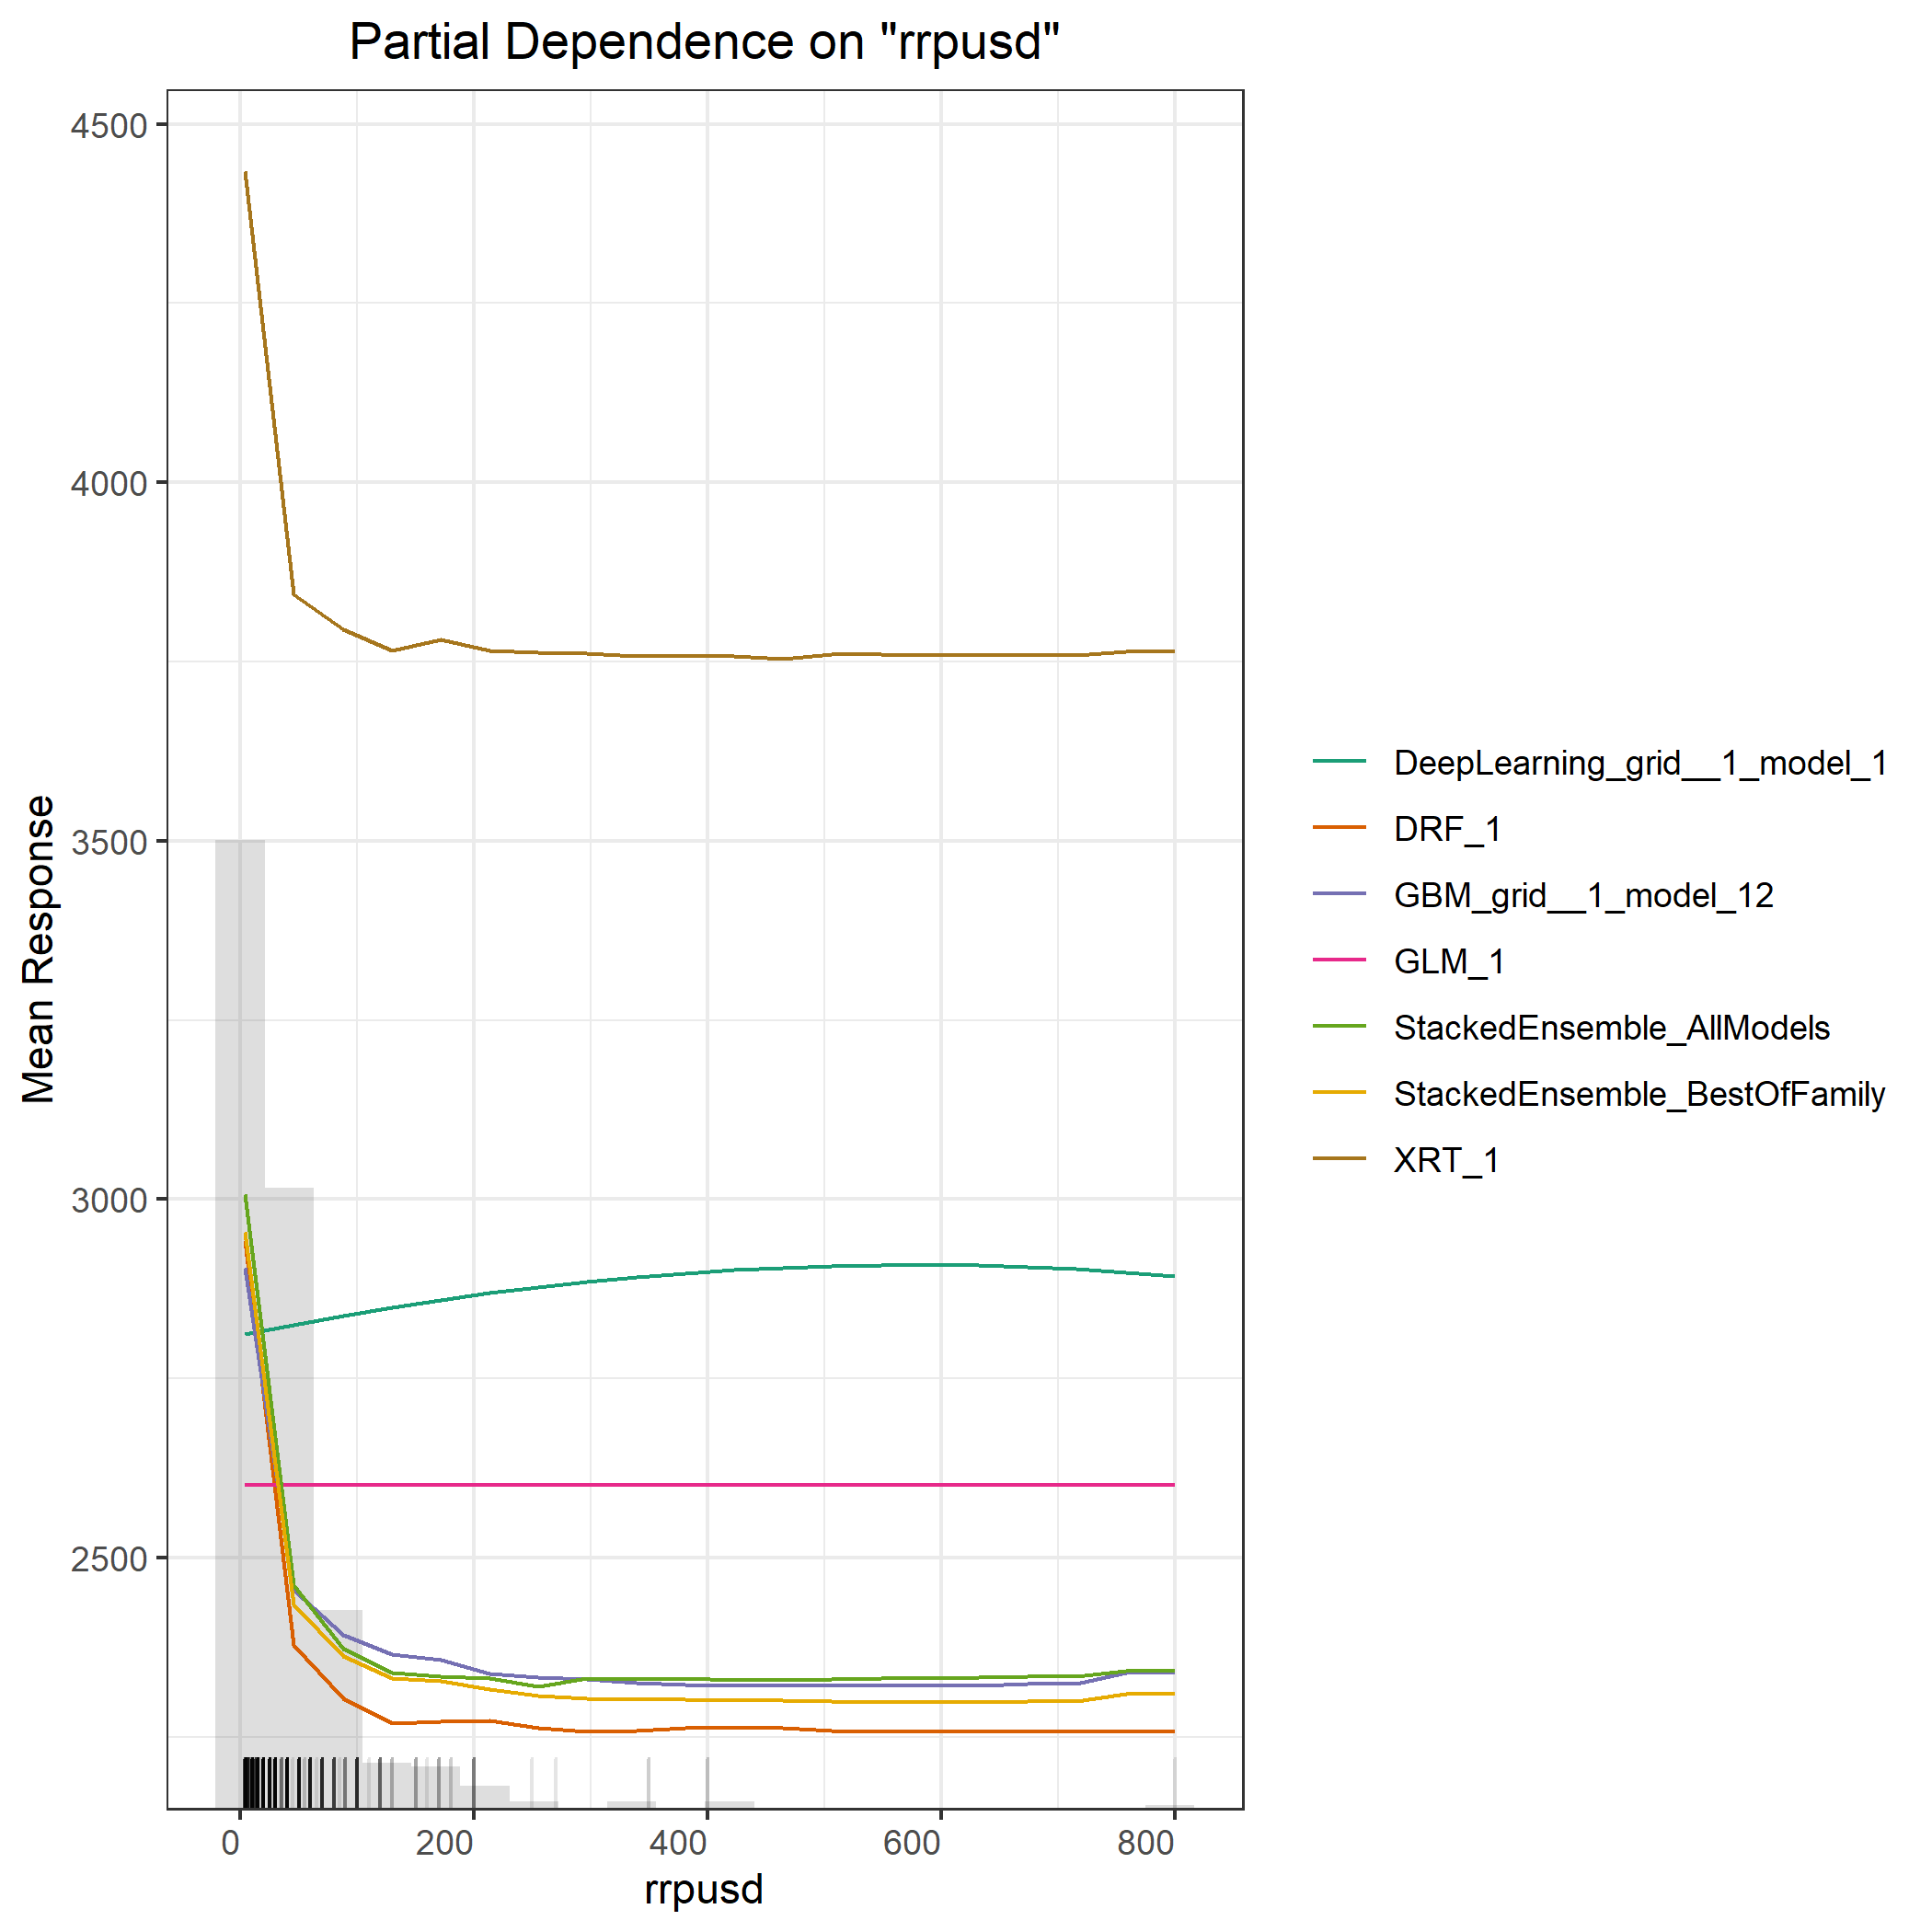

Individual Conditional Expectations

An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

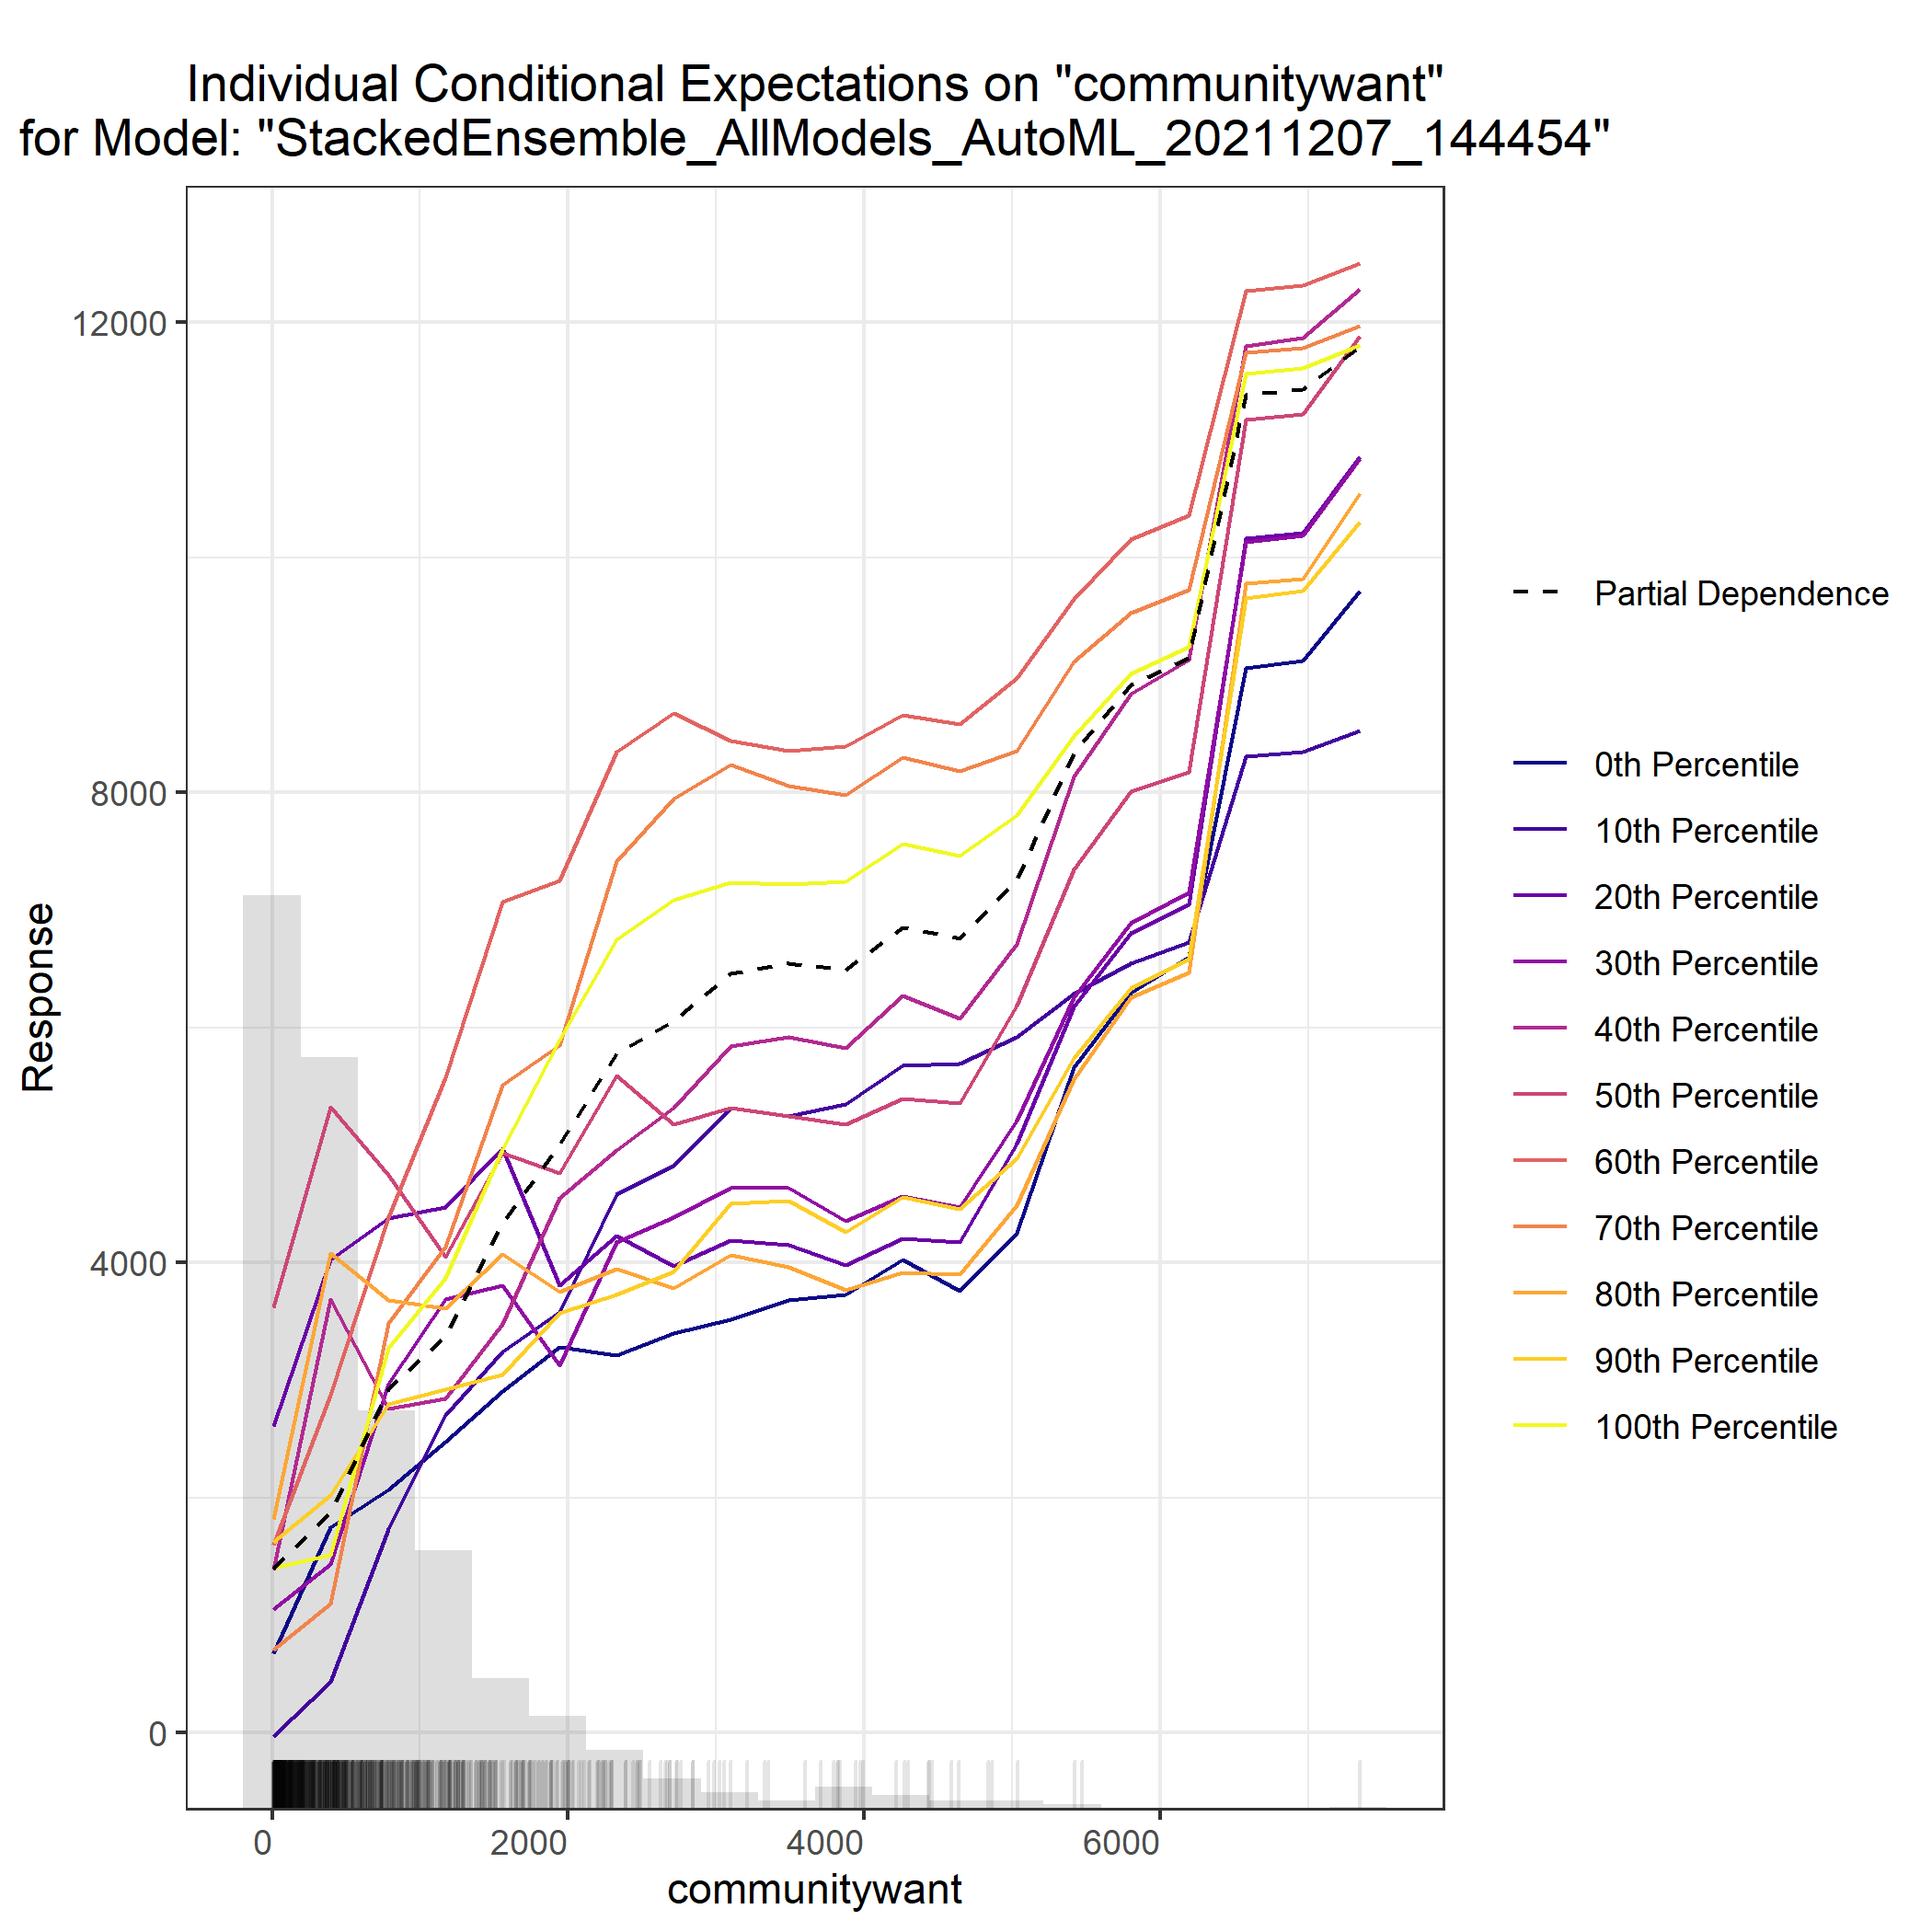

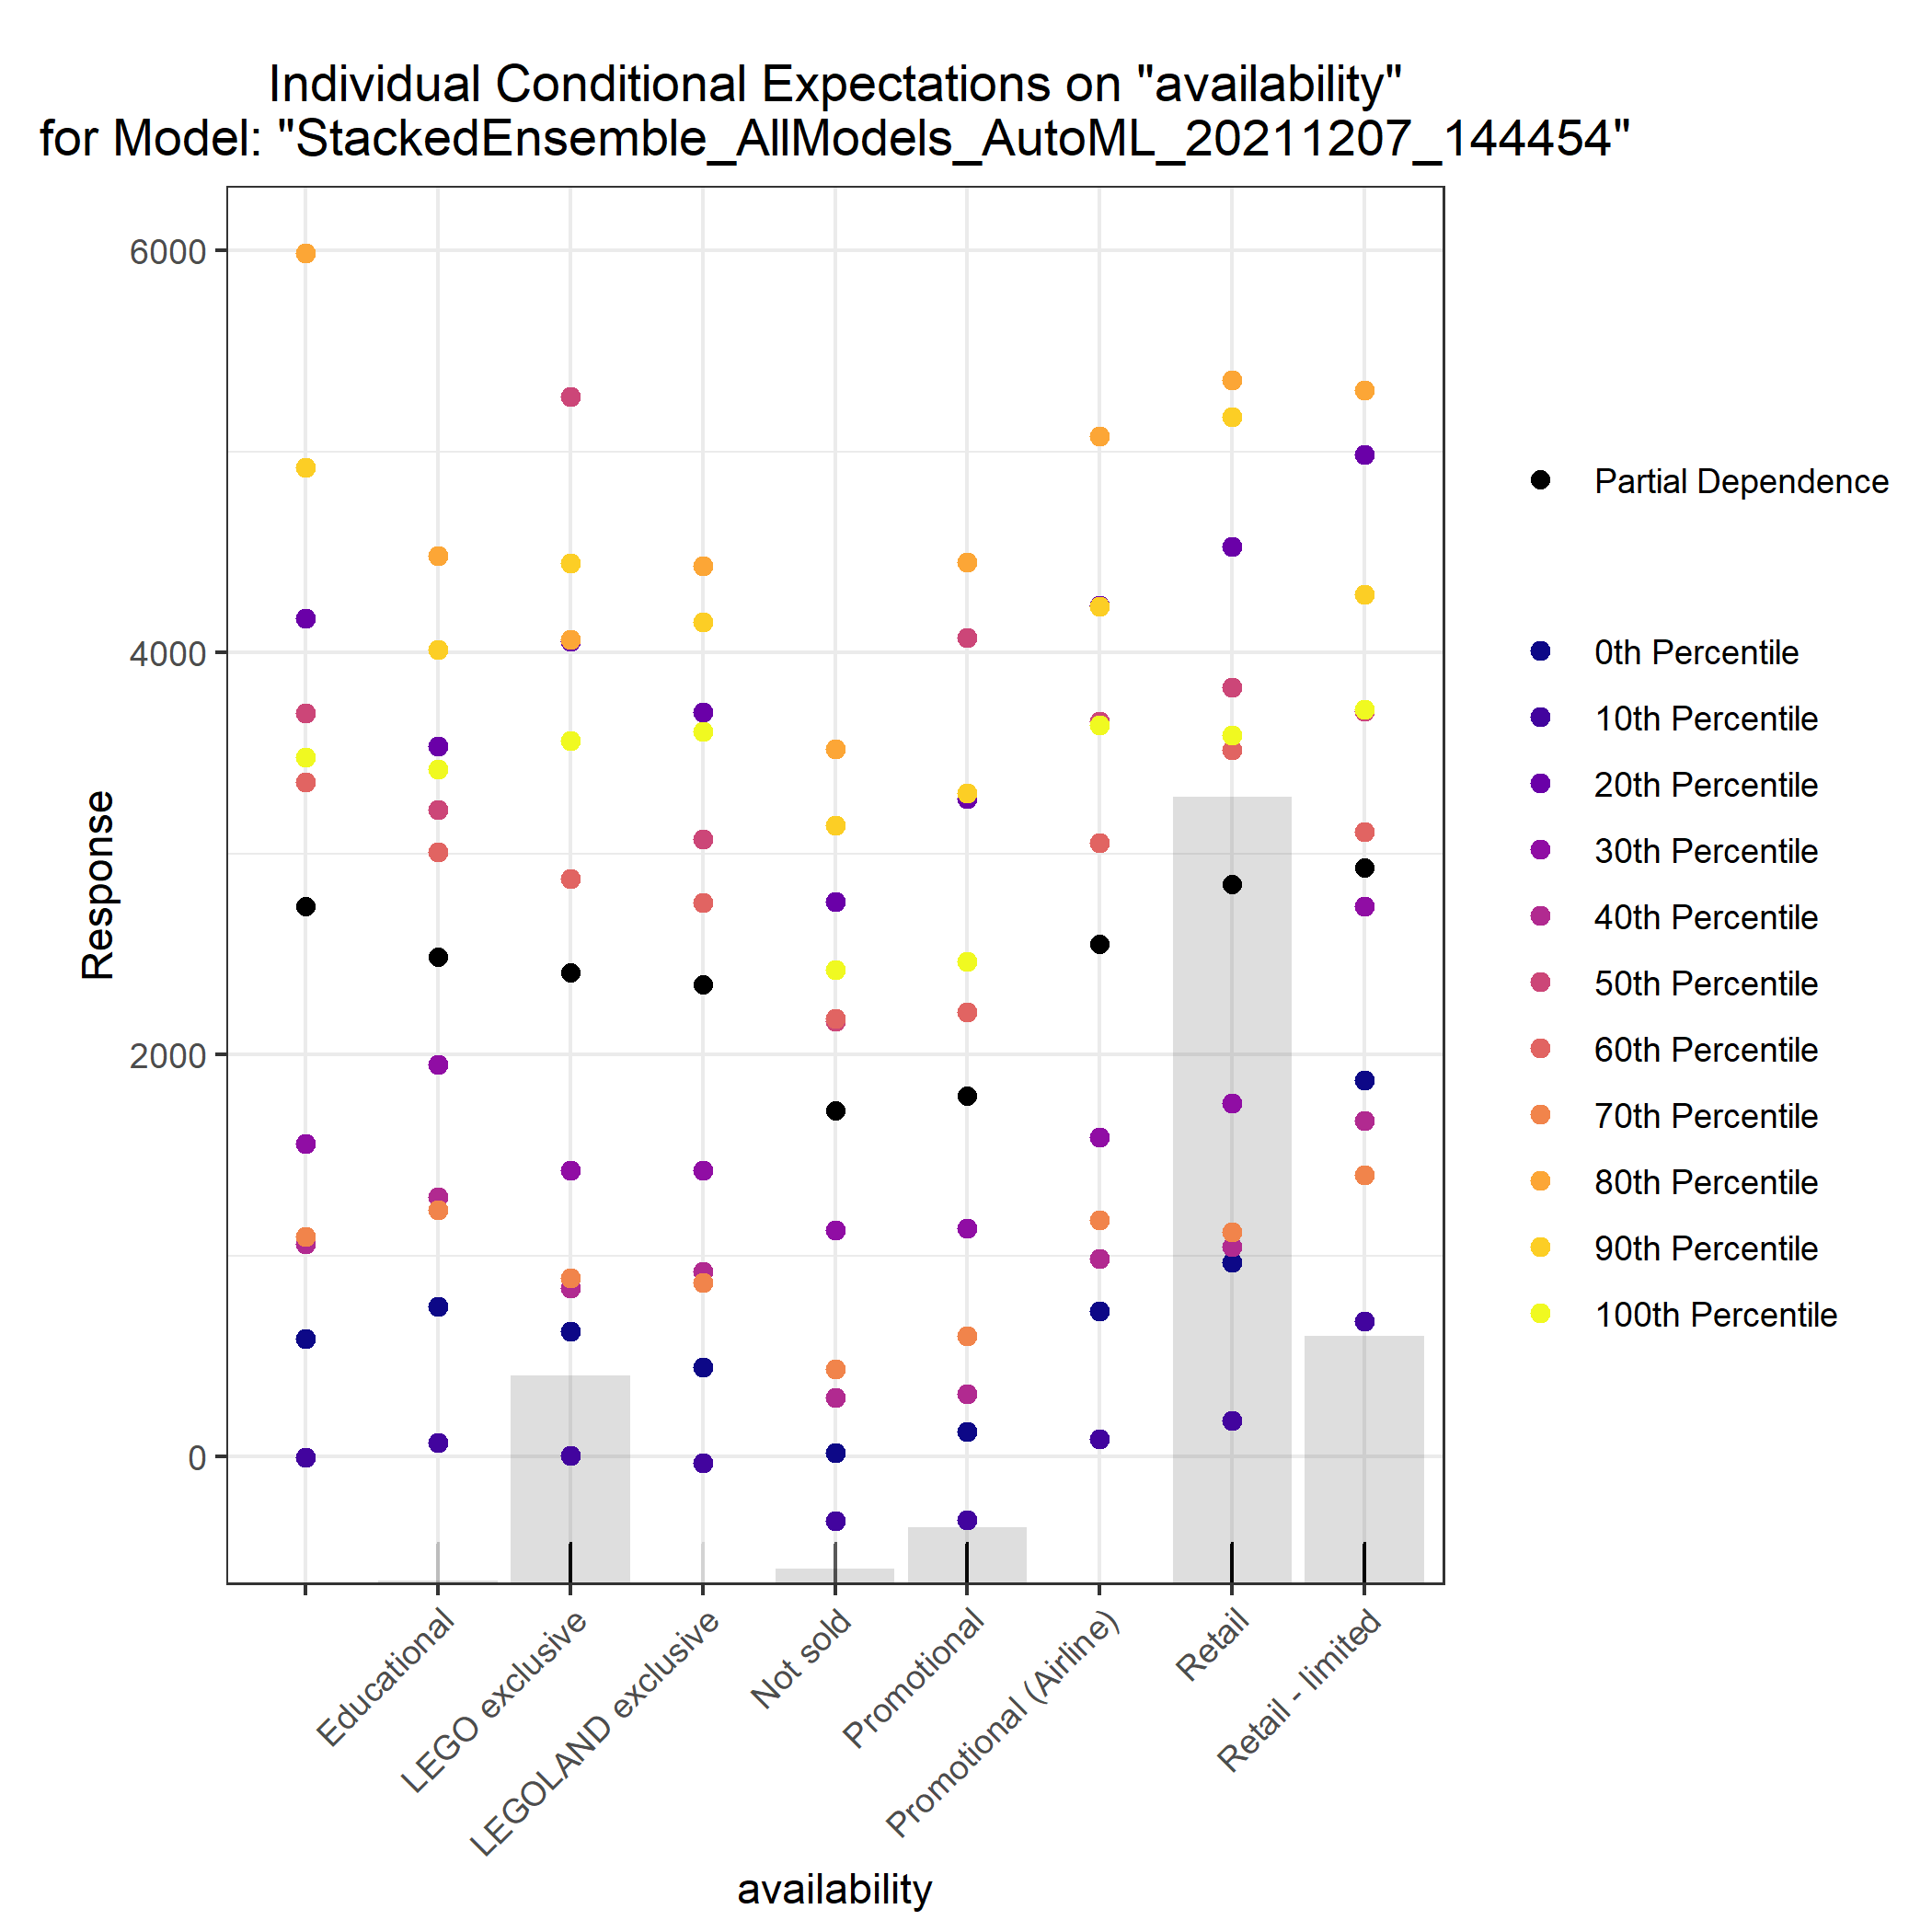

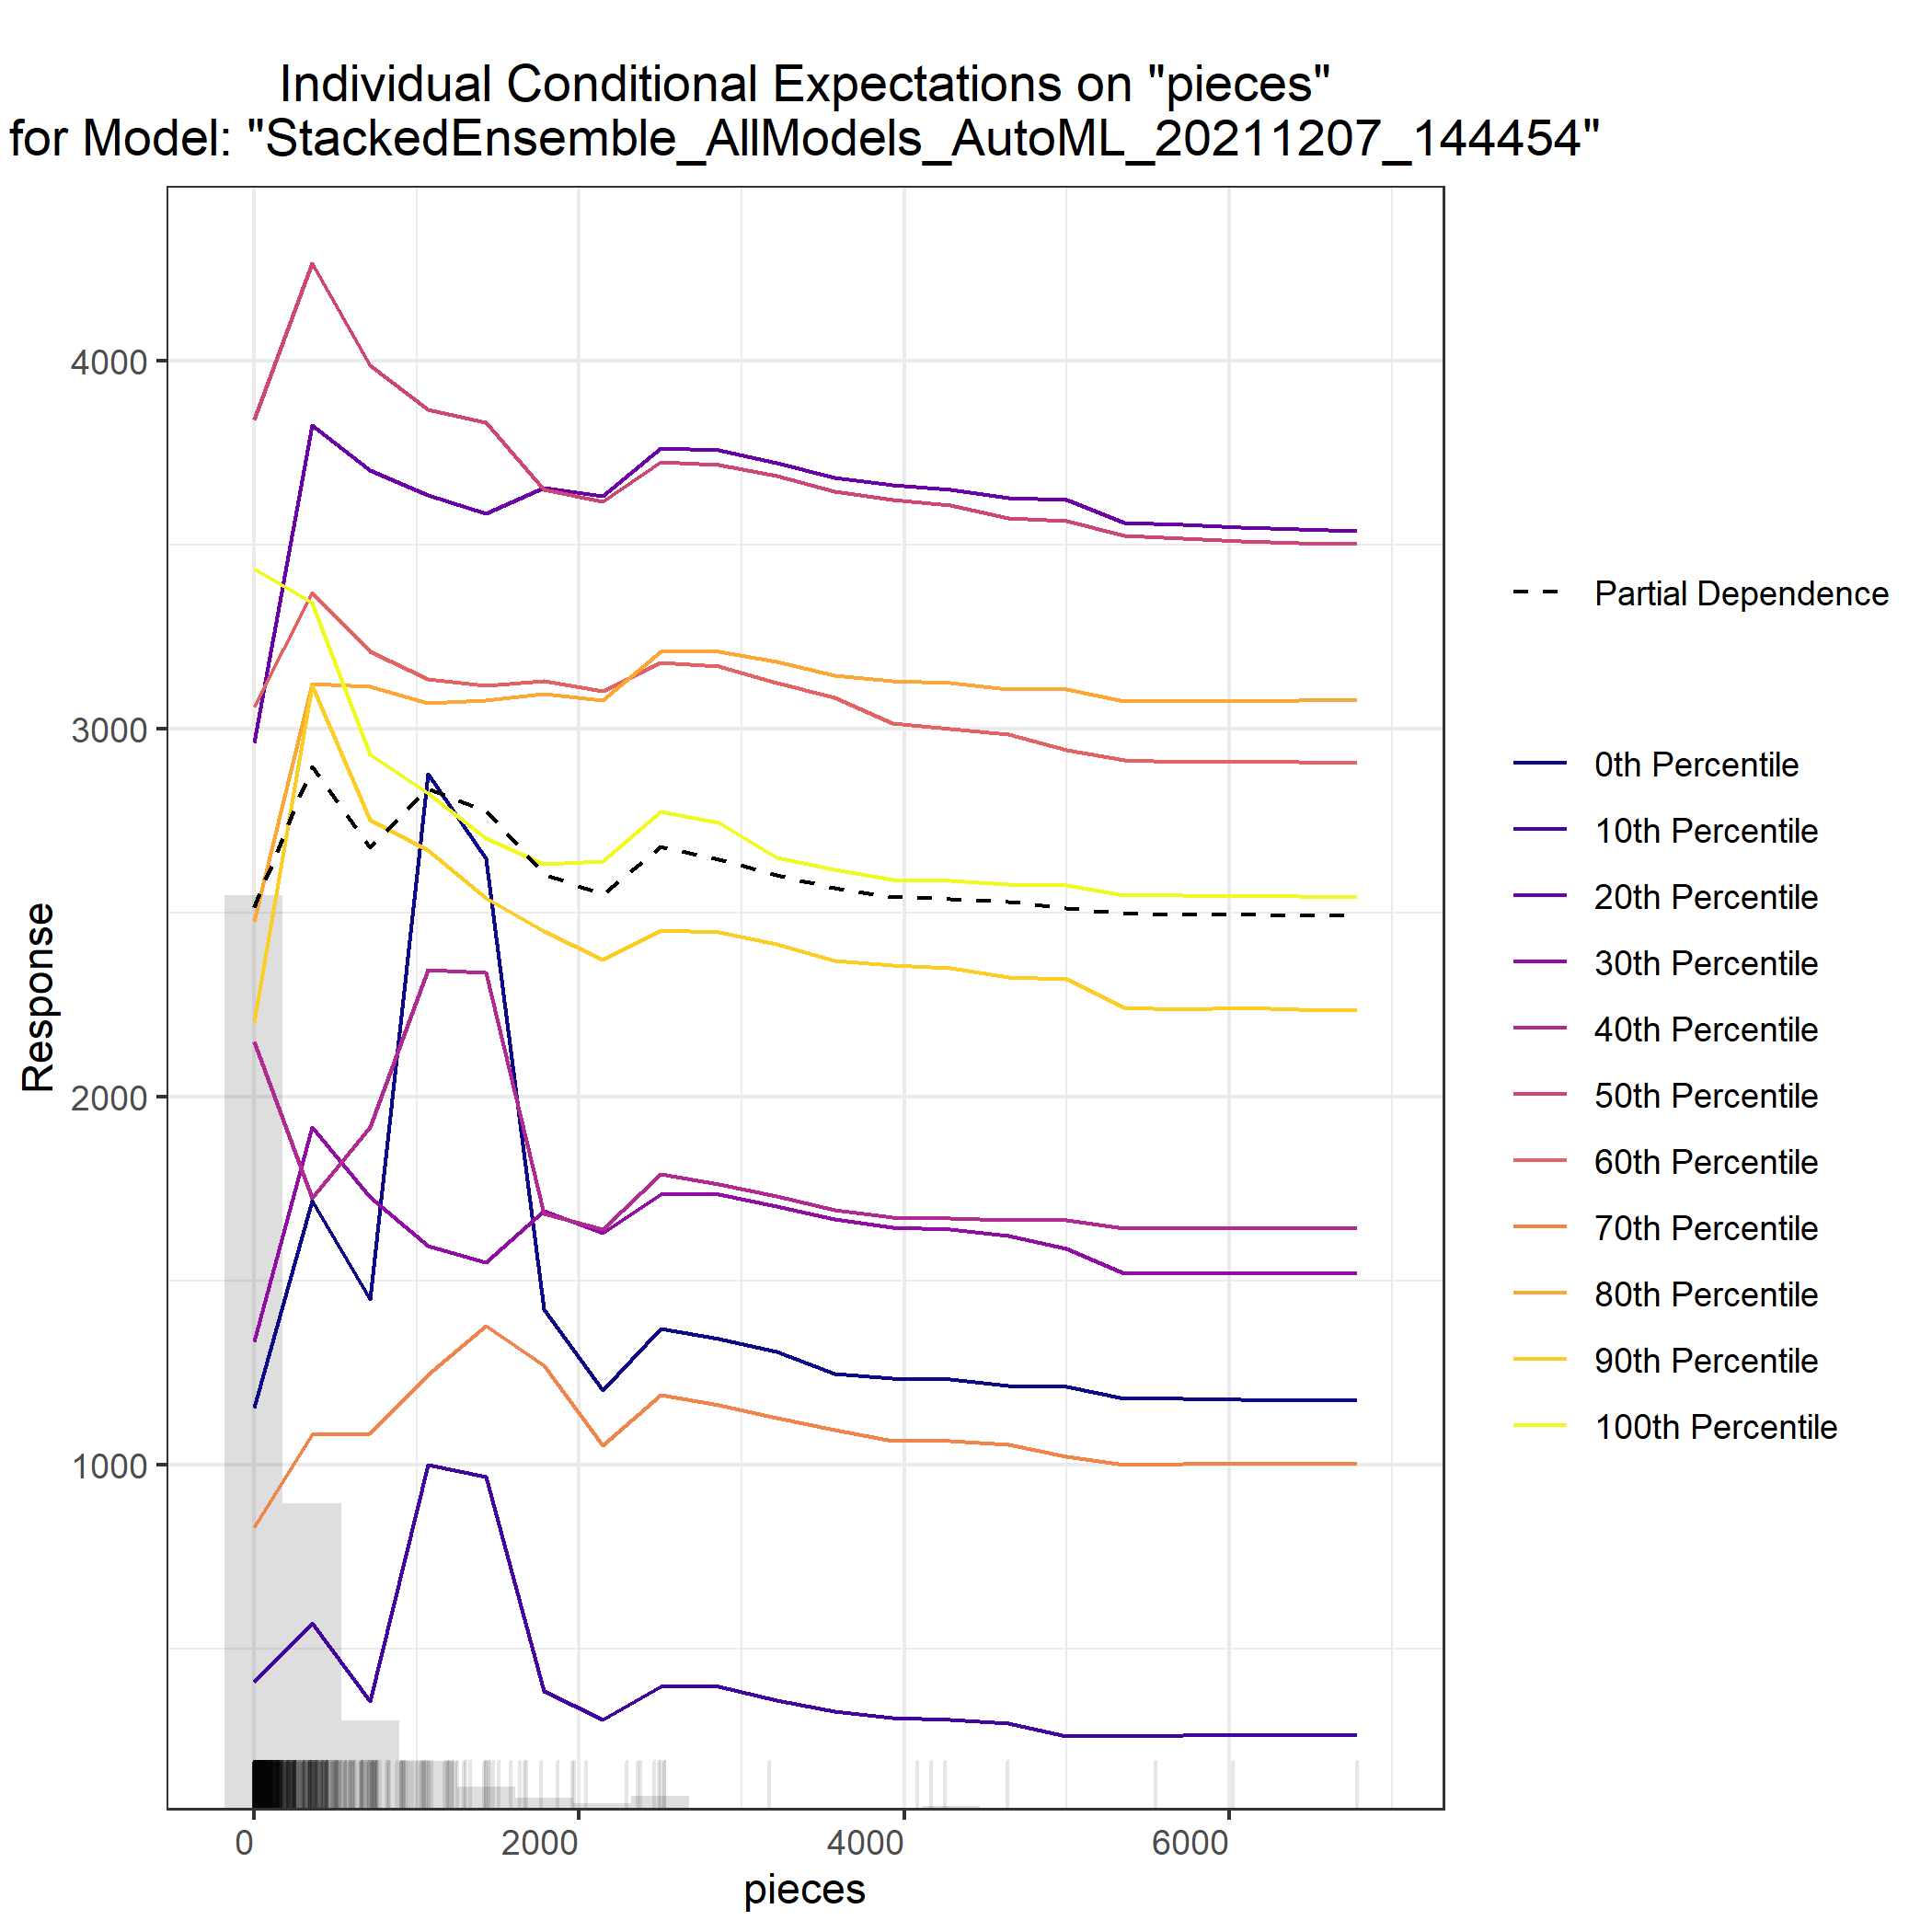

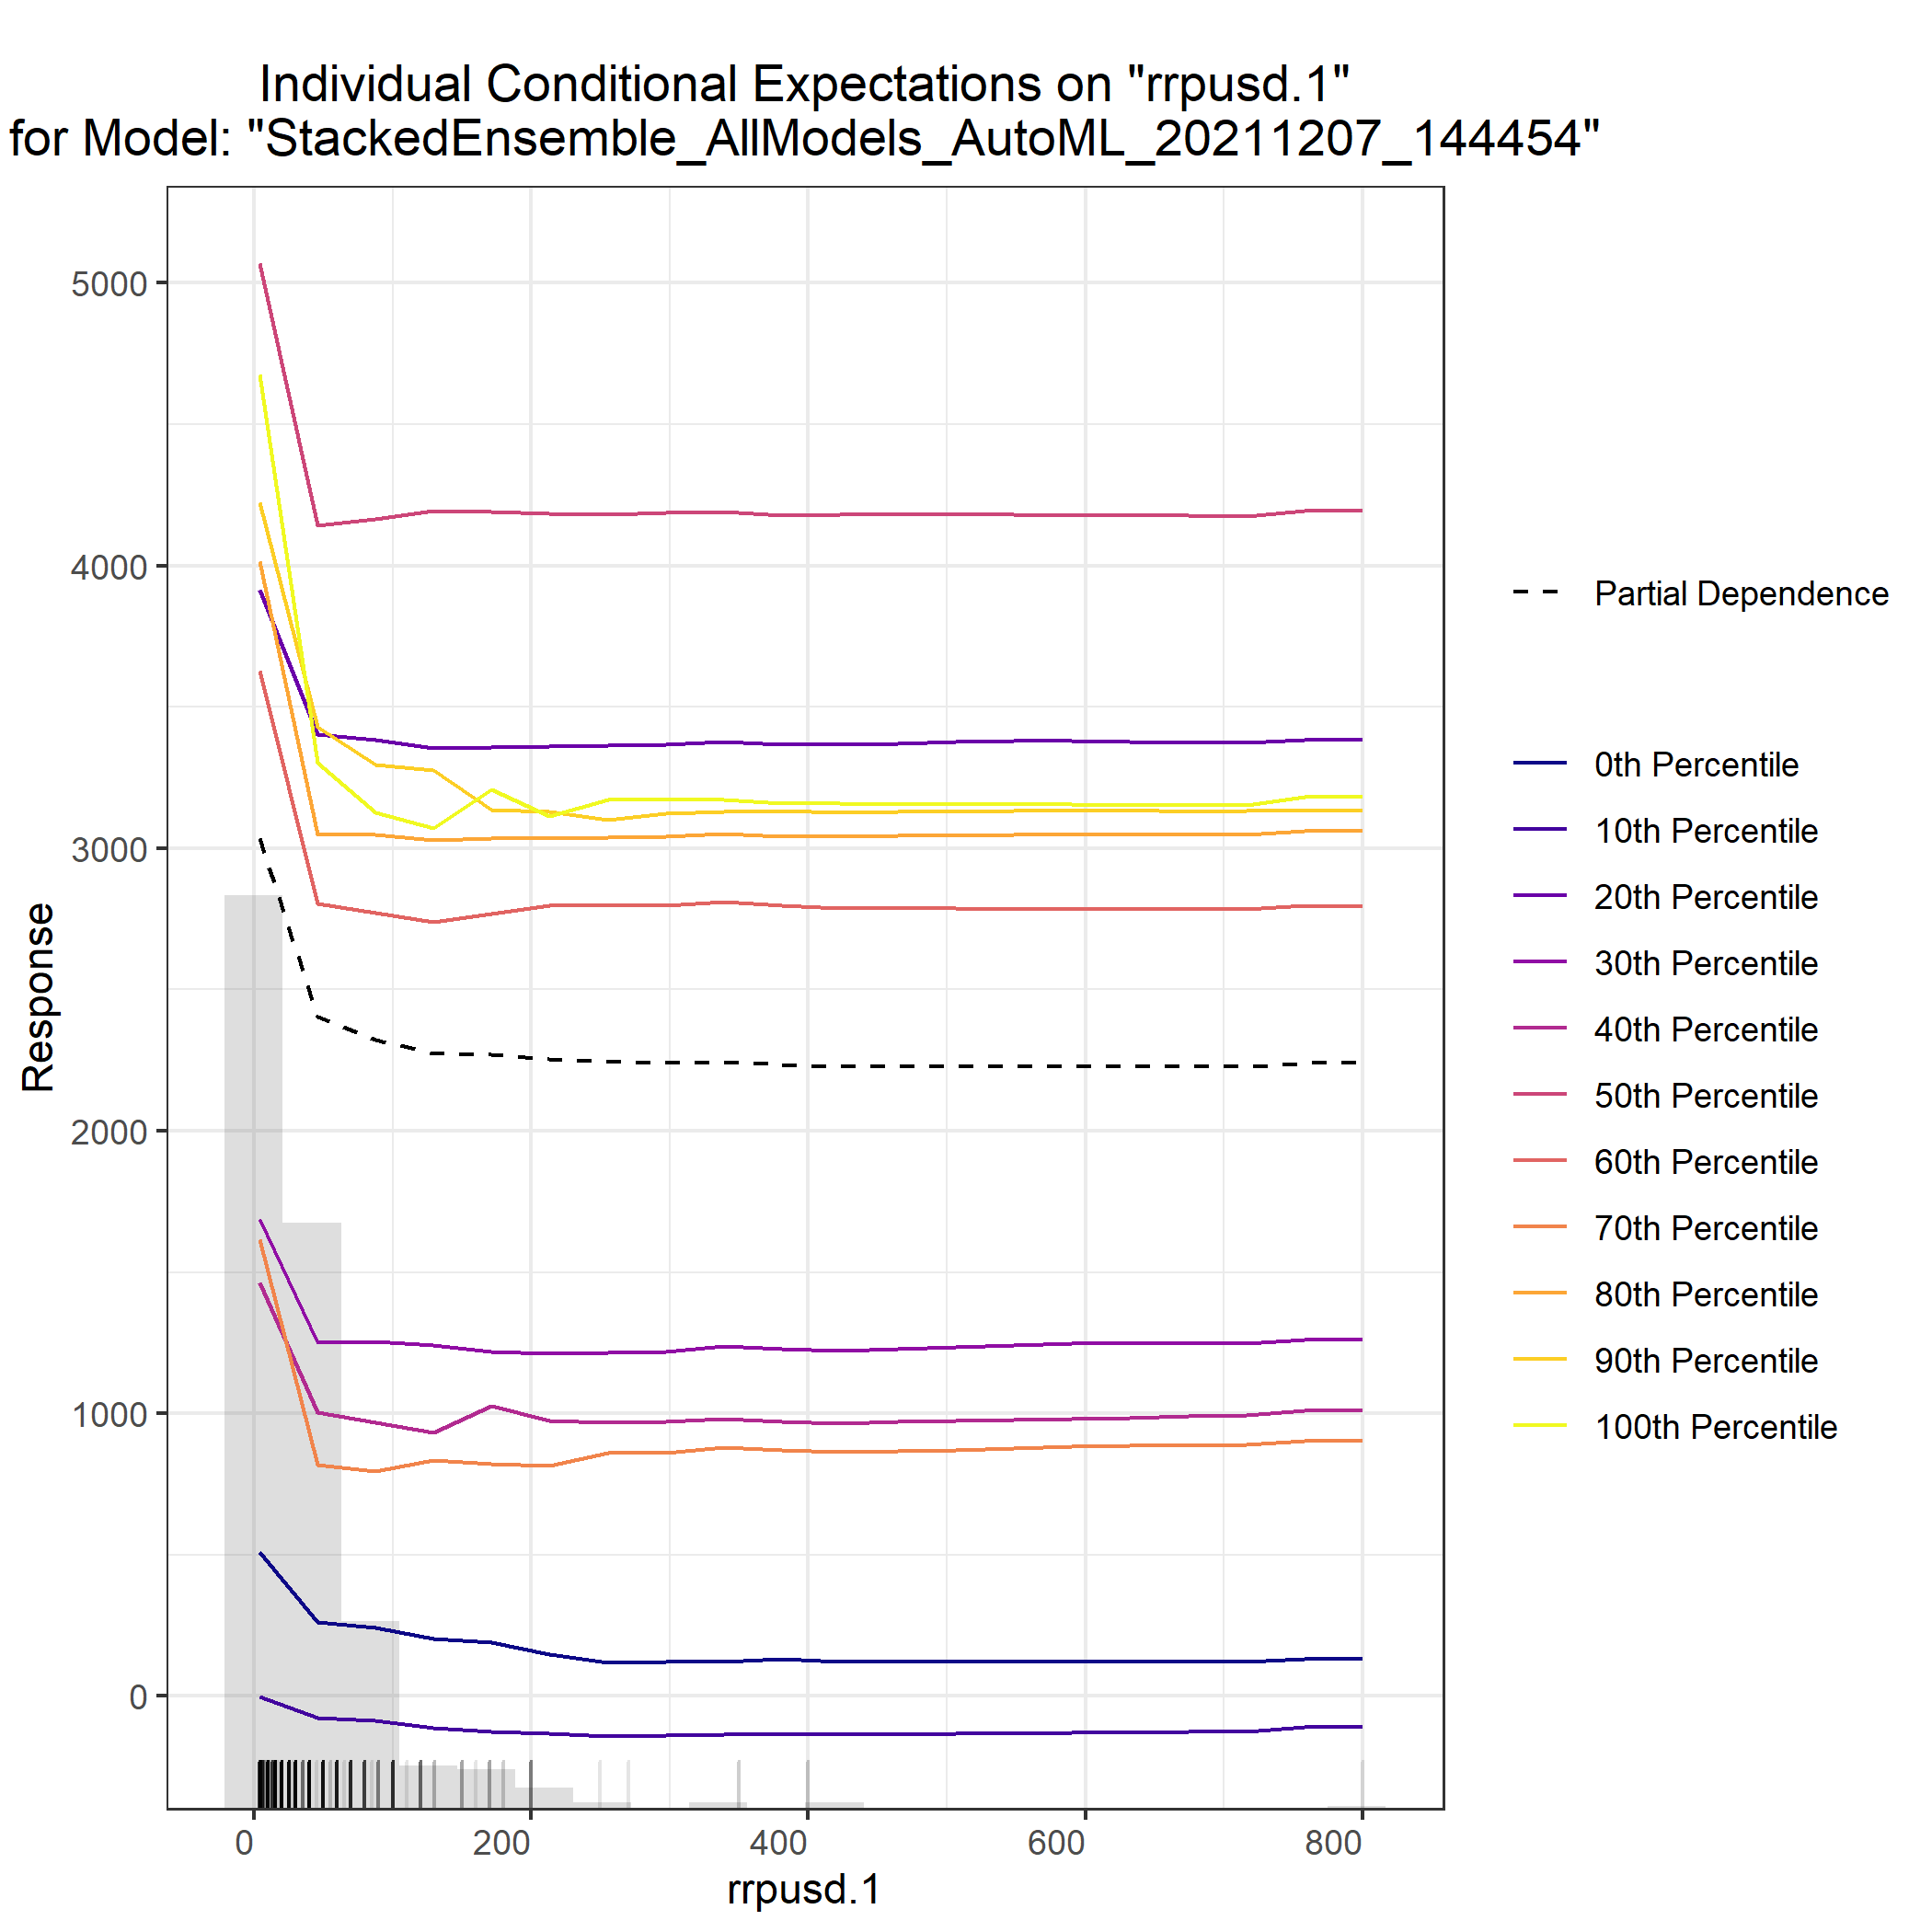

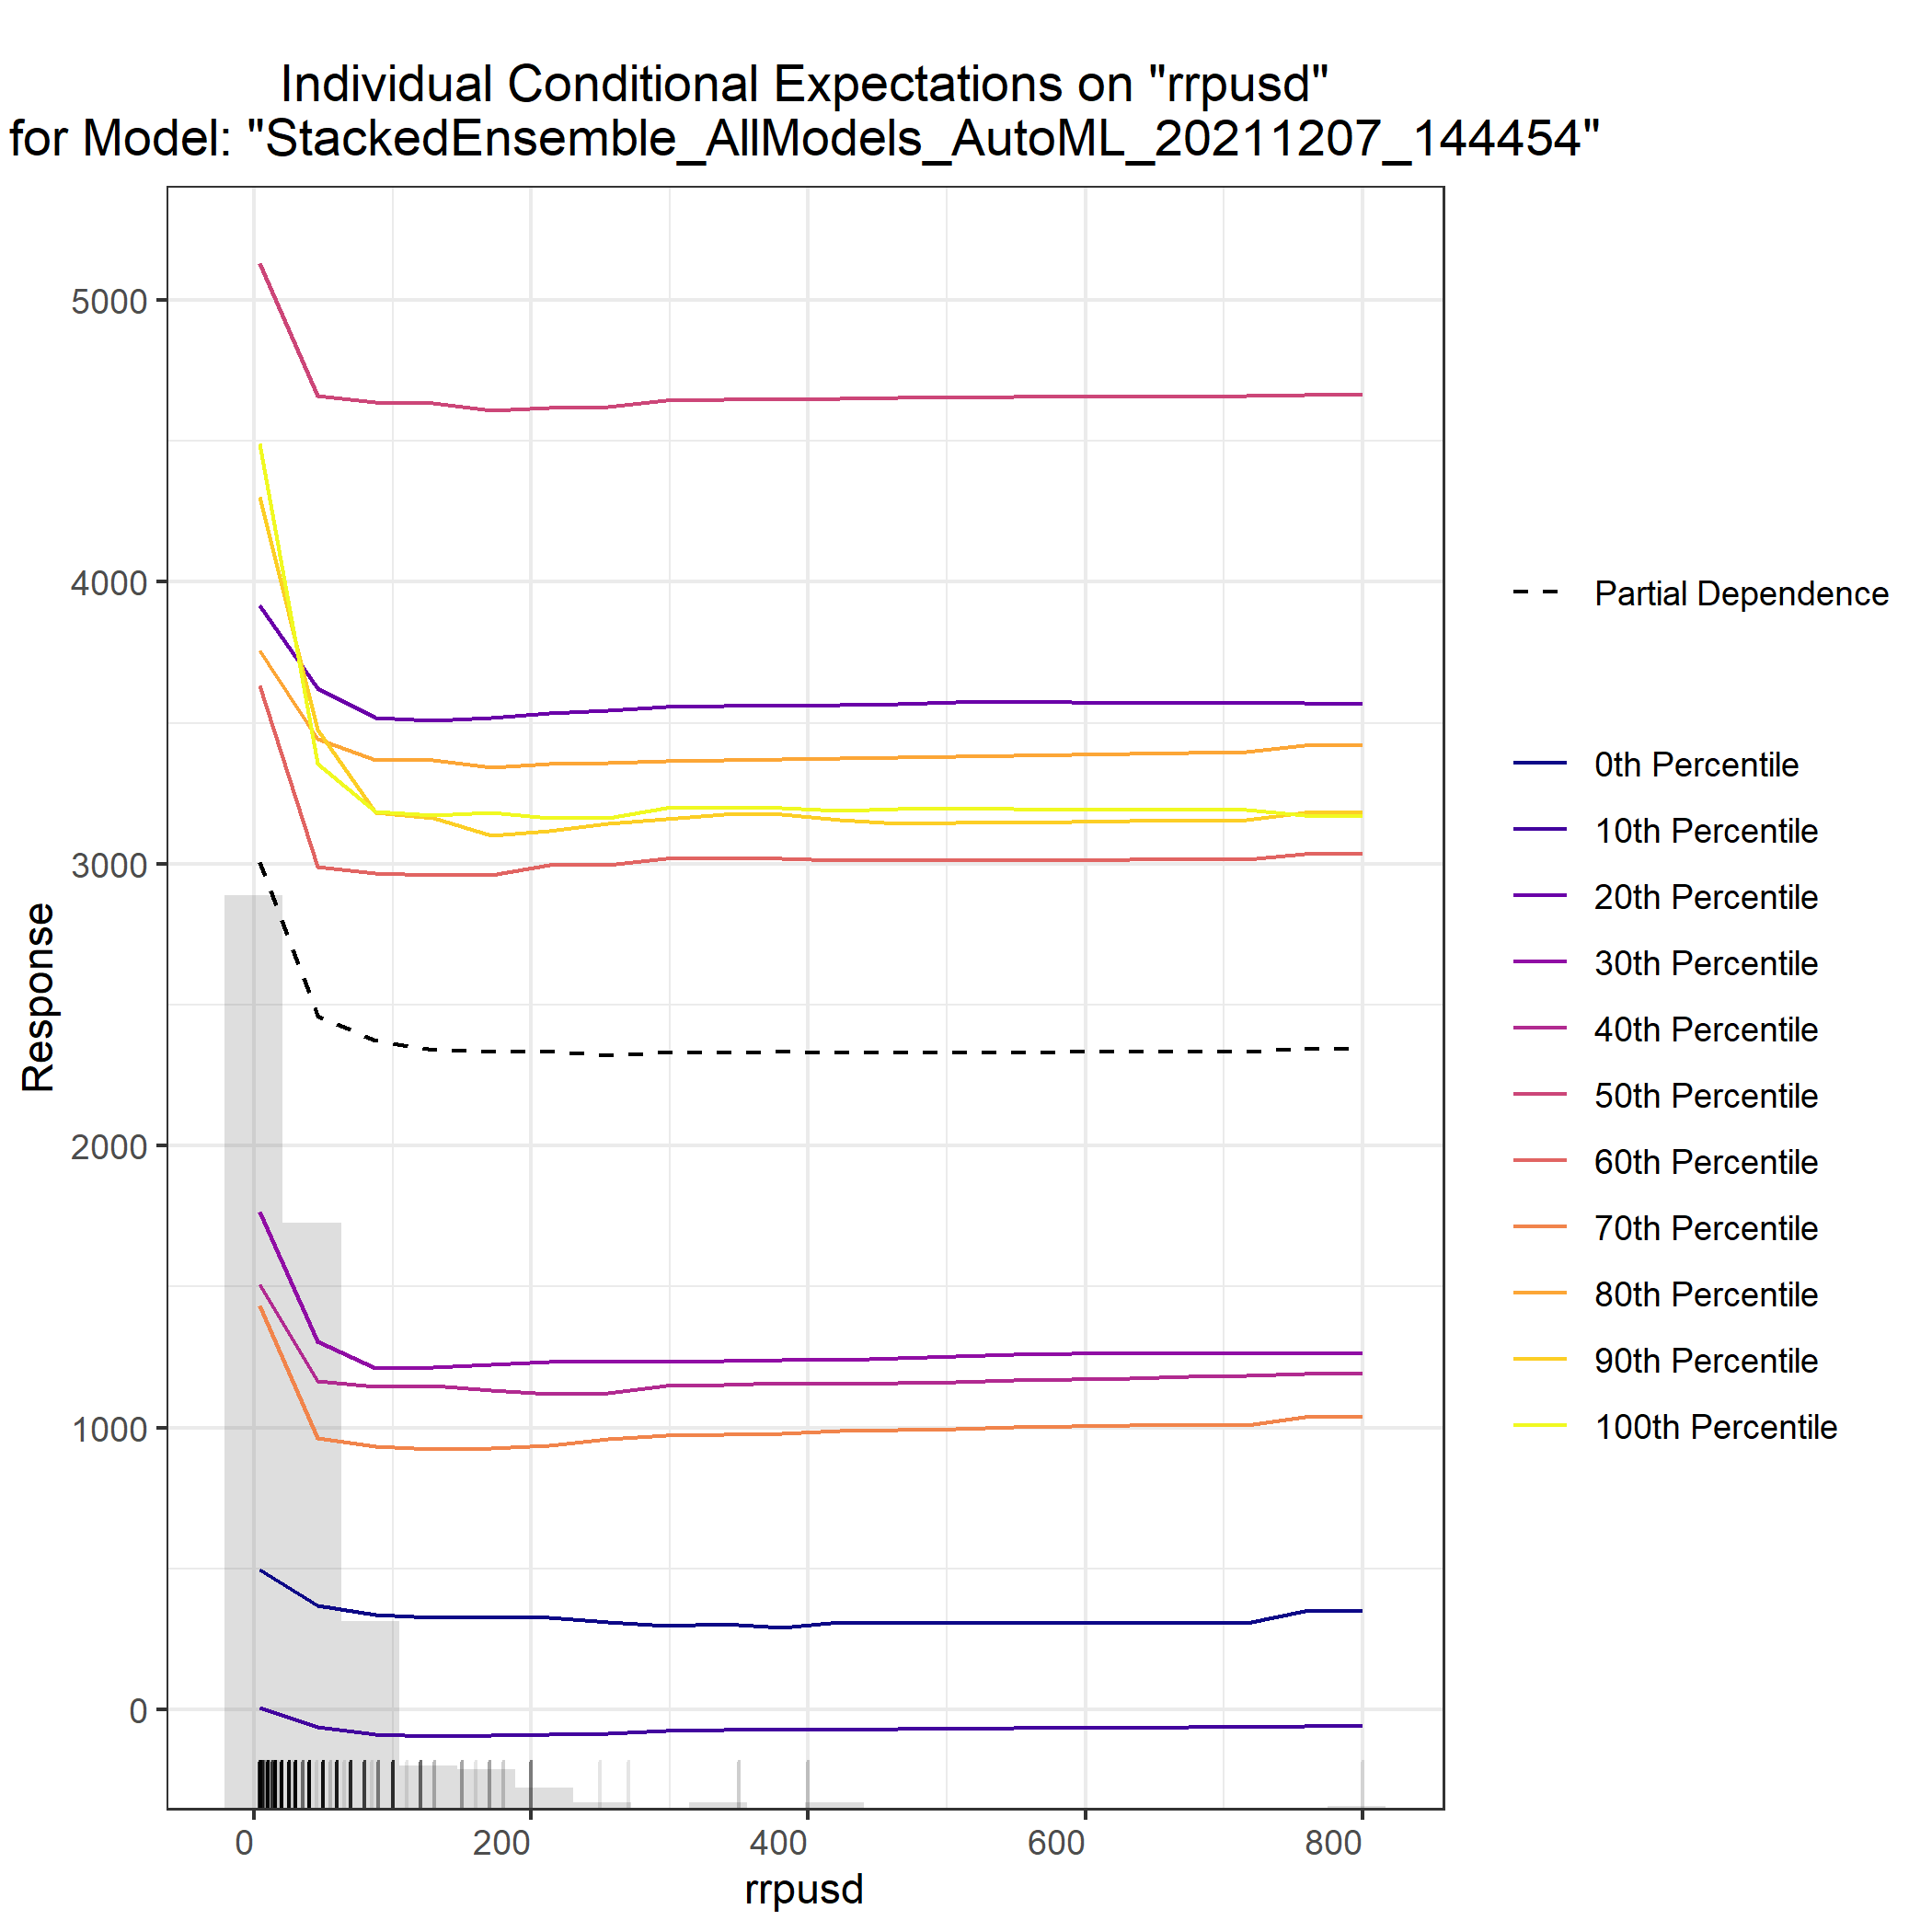

Use print(explanation, render = "notebook")

In [12]:
explain <- h2o.explain(model, test)
explain

# Product sale Forcasting

* Product sales are usally seasonal, so by using stardard time series regresssion analysis we can have some understanding on stock sales going to be in the coming year.

* Similar to the limitation we have in regression modeling, due to many model assumptions are being made. The model is "less flexible" than some of the newer algorithms.

* "Prophet" which is a forcasting pacakge developed by Facebook can give us a good start. Following is an example provided on https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors and https://towardsdatascience.com/forecast-model-tuning-with-additional-regressors-in-prophet-ffcbf1777dda

In [ ]:
df <- read.csv(paste0(path,'weather_day.csv'))
df$ds <- df$dteday
df$y <- df$cnt
df

In [ ]:
data <- df %>% 
    filter(as.Date(ds) < as.Date("2012-12-01"))

future <- df %>%
    filter(as.Date(ds) >= as.Date("2012-12-01"))

dim(data)
dim(future)

In [ ]:
m <- prophet()
m <- add_regressor(m, 'temp')
m <- add_regressor(m, 'weathersit')
m <- fit.prophet(m, data)
forecast <- predict(m, future)

In [ ]:
forecast %>% 
    select(ds, yhat, yhat_lower,yhat_upper) %>%
    tail(10)

In [ ]:
forecast$y <- future$y
p <- plot_ly(forecast, x = ~ds, y = ~yhat, type = "scatter", mode='lines+markers', name = "Predict", line = list(color = "blue"))
p <- p %>% add_trace(forecast, y=~yhat_lower, name="Lower", mode='lines', line = list(dash='dash', color = "blue"))
p <- p %>% add_trace(forecast, y=~yhat_upper, name="High", mode='lines', line = list(dash='dash', color = "blue"))
p <- p %>% add_trace(forecast, y=~y, name="Actual", mode='lines+markers', line = list(color = "red"))
p

In [ ]:
prophet_plot_components(m, forecast)

In [ ]:
PR3ed